<a href="https://colab.research.google.com/github/HaqTetsuya/rusdi-prototype-1/blob/book_search/rusdi_prototype_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title download dependancy
# Cell 1: Instalasi library yang diperlukan
!pip install transformers torch pandas scikit-learn matplotlib seaborn tqdm deep-translator fuzzywuzzy


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 108.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
# @title import dependency, load drive, and github {"form-width":"20%"}
!git clone https://github.com/HaqTetsuya/rusdi-prototype-1.git

import json
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from google.colab import drive, files
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
#from tqdm import tqdm
from tqdm.auto import tqdm  # If you need both tqdm and tqdm.auto
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler

drive.mount('/content/drive')
FName = "RusdiIntent3" #@param {type:"string"}

# Update MODEL_SAVE_PATH with user input
MODEL_SAVE_PATH = f"/content/drive/MyDrive/{FName}"


# Cell 4: Kelas Dataset untuk IndoBERT
class IntentDataset(Dataset):
    """Dataset untuk klasifikasi intent dengan IndoBERT"""

    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Convert dict of tensors to flat tensors
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(label)

        return item

Cloning into 'rusdi-prototype-1'...
remote: Enumerating objects: 577, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 577 (delta 26), reused 29 (delta 7), pack-reused 502 (from 1)
Receiving objects: 100% (577/577), 30.30 MiB | 11.02 MiB/s, done.
Resolving deltas: 100% (281/281), done.
Mounted at /content/drive


In [3]:
# @title load data

def load_csv_data(csv_path, label_encoder=None, show_distribution=False):
    """Memuat data intent dari file CSV. Bisa untuk train/test tanpa split."""
    print(f"\nMemuat data dari: {csv_path}")

    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"File tidak ditemukan: {csv_path}")

    df = pd.read_csv(csv_path)

    if 'text' not in df.columns or 'intent' not in df.columns:
        raise ValueError("Kolom 'text' dan 'intent' harus ada di CSV")

    if label_encoder is None:
        label_encoder = LabelEncoder()
        df['intent_encoded'] = label_encoder.fit_transform(df['intent'])
        intent_classes = label_encoder.classes_
        print(f"Label encoder baru dibuat dari data {csv_path}")
    else:
        df['intent_encoded'] = label_encoder.transform(df['intent'])
        intent_classes = label_encoder.classes_
        print(f"Menggunakan label encoder yang sudah ada")

    if show_distribution:
        intent_counts = df['intent'].value_counts()
        print("\nDistribusi intent:")
        for intent, count in intent_counts.items():
            print(f"  {intent}: {count}")

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.barplot(x=intent_counts.index, y=intent_counts.values, palette="viridis")
        plt.xlabel("Intent")
        plt.ylabel("Jumlah Sampel")
        plt.title("Distribusi Intent")
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(intent_counts)))
        plt.title("Proporsi Intent")
        plt.tight_layout()
        plt.show()

    texts = df['text'].values
    labels = df['intent_encoded'].values

    return texts, labels, intent_classes, label_encoder


In [14]:
# @title  setup model IndoBERT
def setup_indobert_for_intent(num_labels):
    """Load model IndoBERT untuk klasifikasi intent"""

    print("Memuat model IndoBERT...")
    tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
    model = AutoModelForSequenceClassification.from_pretrained(
        "indobenchmark/indobert-base-p1",
        num_labels=num_labels
    )
    print("Model berhasil dimuat")

    return model, tokenizer

In [15]:
# @title OOD
def enhanced_calibrate_ood(model, tokenizer, val_dataloader, save_path, temperature=1.0, percentile=85, margin=0.1):
    """
    Calibrate and save OOD thresholds with adjustable tolerance
    """
    print("Calibrating threshold for OOD detection...")
    thresholds = calibrate_ood_detection(model, tokenizer, val_dataloader,
                                        temperature=temperature,
                                        percentile=percentile,
                                        margin=margin)

    print(f"Energy threshold: {thresholds['energy_threshold']:.4f}")
    print(f"MSP threshold: {thresholds['msp_threshold']:.4f}")

    # Save thresholds
    save_ood_thresholds(thresholds, save_path)

    return thresholds

def calibrate_ood_detection(model, tokenizer, dataloader, temperature=1.0, percentile=70, margin=0.1):
    """
    Calibrate thresholds for OOD detection using in-distribution data
    with Energy-based and MSP (Maximum Softmax Probability) methods
    """
    device = next(model.parameters()).device
    model.eval()

    # For Energy method and MSP method
    energy_scores = []
    msp_scores = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Calibrating OOD detection"):
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            outputs = model(**inputs)
            logits = outputs.logits

            # Energy score (higher values for OOD)
            energy = -temperature * torch.logsumexp(logits / temperature, dim=1)
            energy_scores.extend(energy.cpu().numpy())

            # MSP score (lower values for OOD)
            softmax_probs = F.softmax(logits, dim=1)
            max_probs, _ = torch.max(softmax_probs, dim=1)
            msp_scores.extend(max_probs.cpu().numpy())

    # Calculate threshold for Energy with margin (make more tolerant)
    base_energy_threshold = np.percentile(energy_scores, percentile)
    # Apply margin to make more tolerant (increase threshold)
    energy_threshold = base_energy_threshold * (1 + margin)

    # Calculate threshold for MSP with margin
    base_msp_threshold = np.percentile(msp_scores, 100 - percentile)
    # Apply margin to make more tolerant (decrease threshold)
    msp_threshold = base_msp_threshold * (1 - margin)

    return {
        "energy_threshold": float(energy_threshold),
        "msp_threshold": float(msp_threshold)
    }

def predict_with_ood_detection(model, tokenizer, text, thresholds, temperature=1.0, tolerance_factor=1.0):
    """
    Predict with adjustable OOD detection tolerance
    """
    device = next(model.parameters()).device
    model.eval()

    # Apply the tolerance factor to thresholds
    energy_threshold = thresholds["energy_threshold"] * tolerance_factor
    msp_threshold = thresholds["msp_threshold"] / tolerance_factor if thresholds["msp_threshold"] else None

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # Energy score
        energy = -temperature * torch.logsumexp(logits / temperature, dim=1)
        energy_score = energy.item()

        # MSP score
        softmax_probs = F.softmax(logits, dim=1)
        max_probs, predicted_class = torch.max(softmax_probs, dim=1)
        msp_score = max_probs.item()

        # OOD detection
        is_ood_energy = energy_score > energy_threshold
        is_ood_msp = msp_score < msp_threshold if msp_threshold else False

        # Combined OOD detection (can adjust this logic for tolerance)
        is_ood = is_ood_energy  # You can use different combinations

        return {
            "prediction": predicted_class.item(),
            "confidence": msp_score,
            "energy_score": energy_score,
            "is_ood": is_ood,
            "is_ood_energy": is_ood_energy,
            "is_ood_msp": is_ood_msp
        }

def save_ood_thresholds(thresholds, save_path):
    """
    Save OOD thresholds to JSON file
    """
    threshold_file = os.path.join(save_path, "ood_thresholds.json")
    with open(threshold_file, 'w') as f:
        json.dump(thresholds, f, indent=4)
    print(f"OOD thresholds saved at {threshold_file}")
    return threshold_file

def load_ood_thresholds(model_path):
    """
    Load OOD thresholds from JSON file
    """
    try:
        with open(os.path.join(model_path, "ood_thresholds.json"), 'r') as f:
            thresholds = json.load(f)
            return thresholds
    except FileNotFoundError:
        try:
            with open(os.path.join(model_path, "ood_threshold.json"), 'r') as f:
                threshold_data = json.load(f)
                return {
                    "energy_threshold": threshold_data["energy_threshold"],
                    "msp_threshold": None
                }
        except FileNotFoundError:
            print("Warning: OOD threshold files not found. Using default thresholds.")
            return {
                "energy_threshold": 0.0,
                "msp_threshold": 0.5
            }

In [16]:
# @title Focal LOSS
import torch.nn.functional as F
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


In [17]:
#@title Training function

def train_intent_classifier(model, tokenizer, train_texts, train_labels, val_texts, val_labels,
                           batch_size=16, epochs=10, learning_rate=2e-5, weight_decay=0.01,
                           save_path=MODEL_SAVE_PATH, use_class_weights=True, patience=3, class_names=None):
    """
    Melatih model IndoBERT untuk klasifikasi intent dengan perbaikan:
    - Enhanced visualization (interactive and static)
    - Per-class metric tracking
    - Confusion matrix generation
    - Batch-level metric tracking
    - Learning rate visualization
    """

    # Persiapkan dataset
    print("Menyiapkan dataset...")
    train_dataset = IntentDataset(train_texts, train_labels, tokenizer)
    val_dataset = IntentDataset(val_texts, val_labels, tokenizer)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    # Compute class weights if needed
    class_weights = None
    if use_class_weights:
        unique_classes = np.unique(train_labels)
        weights = compute_class_weight(
            class_weight='balanced',
            classes=unique_classes,
            y=train_labels
        )
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        class_weights = torch.FloatTensor(weights).to(device)
        print(f"Menggunakan class weights: {weights}")

    # Optimizer dengan weight decay untuk regularisasi
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Scheduler dengan warmup
    num_training_steps = len(train_dataloader) * epochs
    num_warmup_steps = int(0.1 * num_training_steps)  # 10% warmup
    scheduler = get_scheduler("cosine", optimizer=optimizer,
                             num_warmup_steps=num_warmup_steps,
                             num_training_steps=num_training_steps)

    # Cek untuk GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Menggunakan device: {device}")
    model.to(device)
    print(f"Mulai pelatihan model...")
    print(f"Total epoch: {epochs}, batch size: {batch_size}, learning rate: {learning_rate}, weight decay: {weight_decay}")

    # Create loss function with class weights if needed
    # Create Focal Loss with class weights
    loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)
    print("Menggunakan Focal Loss dengan gamma=2.0")

    # Initialize training history
    history = initialize_training_history()
    best_val_loss = float('inf')
    counter = 0  # Counter for early stopping

    for epoch in range(epochs):
        # Training phase
        train_loss = run_training_epoch(model, device, train_dataloader, optimizer,
                                        scheduler, loss_fn, epoch, epochs, history)
        history['train_loss'].append(train_loss)

        # Validation phase
        val_metrics = run_validation_epoch(model, device, val_dataloader, loss_fn, epoch, epochs)
        update_history_with_validation_metrics(history, val_metrics)

        # Update per-class metrics if class names are provided
        if class_names is not None:
            update_per_class_metrics(history, val_metrics['all_labels'], val_metrics['all_preds'])

            # Generate confusion matrix for this epoch
            plot_confusion_matrix(val_metrics['all_labels'], val_metrics['all_preds'], class_names, epoch, save_path)

        # Print detailed metrics
        print_epoch_metrics(epoch, epochs, train_loss, val_metrics)

        # Early stopping and model saving logic
        counter = handle_early_stopping(model, tokenizer, val_metrics['avg_val_loss'],
                                      best_val_loss, counter, patience,
                                      save_path, val_metrics['all_labels'],
                                      val_metrics['all_preds'])

        if counter >= patience:
            print(f"Early stopping triggered setelah {epoch+1} epochs")
            break

        # Update best validation loss if improved
        if val_metrics['avg_val_loss'] < best_val_loss:
            best_val_loss = val_metrics['avg_val_loss']

    print(f"Pelatihan selesai! Model terbaik disimpan di {save_path}")

    # Generate enhanced visualizations
    enhanced_plot_training_results(history, save_path, class_names=class_names)

    # Simpan history ke file JSON
    save_enhanced_history(history, save_path)

    return model, history

def initialize_training_history():
    """Initialize the training history dictionary with all required keys"""
    return {
        'train_loss': [],
        'val_loss': [],
        'val_accuracy': [],
        'val_f1': [],
        'val_precision': [],
        'val_recall': [],
        'batch_metrics': {
            'iteration': [],
            'loss': [],
            'epoch': [],
            'progress': [],
            'learning_rates': []
        },
        'class_f1': [],  # Per-class F1 scores
        'class_precision': [],  # Per-class precision
        'class_recall': []  # Per-class recall
    }

def run_training_epoch(model, device, train_dataloader, optimizer, scheduler, loss_fn, epoch, epochs, history):
    """Run a single training epoch and return average loss"""
    model.train()
    train_loss = 0
    print(f"\nEpoch {epoch+1}/{epochs} - Training dimulai...")
    progress_bar = tqdm(enumerate(train_dataloader), total=len(train_dataloader),
                      desc=f"Epoch {epoch+1}/{epochs} [Training]", leave=False)

    for batch_idx, batch in progress_bar:
        try:
            # Pindahkan batch ke device
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)

            # Forward pass with custom loss function
            optimizer.zero_grad()
            outputs = model(**inputs)
            loss = loss_fn(outputs.logits, labels)

            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()

            # Track batch-level metrics
            update_batch_metrics(history, batch_idx, loss.item(), epoch, len(train_dataloader), optimizer)

            train_loss += loss.item()
            progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})

        except RuntimeError as e:
            if "out of memory" in str(e):
                print("Peringatan: Kehabisan memori! Membersihkan cache...")
                torch.cuda.empty_cache()
                continue
            else:
                raise e

    return train_loss / len(train_dataloader)

def update_batch_metrics(history, batch_idx, loss_item, epoch, iterations_per_epoch, optimizer):
    """Update history with batch-level metrics"""
    global_iteration = epoch * iterations_per_epoch + batch_idx
    progress = (epoch + (batch_idx / iterations_per_epoch)) * 100

    history['batch_metrics']['iteration'].append(global_iteration)
    history['batch_metrics']['loss'].append(loss_item)
    history['batch_metrics']['epoch'].append(epoch)
    history['batch_metrics']['progress'].append(progress)
    history['batch_metrics']['learning_rates'].append(optimizer.param_groups[0]['lr'])

def run_validation_epoch(model, device, val_dataloader, loss_fn, epoch, epochs):
    """Run a single validation epoch and return metrics"""
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    print(f"Epoch {epoch+1}/{epochs} - Validasi dimulai...")
    progress_bar = tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{epochs} [Validation]", leave=False)

    with torch.no_grad():
        for batch in progress_bar:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)

            outputs = model(**inputs)
            loss = loss_fn(outputs.logits, labels)
            val_loss += loss.item()

            # Calculate accuracy
            predictions = torch.argmax(outputs.logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

            # Collect predictions and labels for metrics
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})

    # Calculate metrics
    avg_val_loss = val_loss / len(val_dataloader)
    accuracy = correct / total
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)

    return {
        'avg_val_loss': avg_val_loss,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'all_preds': all_preds,
        'all_labels': all_labels
    }

def update_history_with_validation_metrics(history, val_metrics):
    """Update history with validation metrics"""
    history['val_loss'].append(val_metrics['avg_val_loss'])
    history['val_accuracy'].append(val_metrics['accuracy'])
    history['val_f1'].append(val_metrics['f1'])
    history['val_precision'].append(val_metrics['precision'])
    history['val_recall'].append(val_metrics['recall'])

def update_per_class_metrics(history, all_labels, all_preds):
    """Update per-class metrics in history"""
    class_f1 = f1_score(all_labels, all_preds, average=None, zero_division=0)
    class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
    class_recall = recall_score(all_labels, all_preds, average=None, zero_division=0)

    history['class_f1'].append(class_f1.tolist())
    history['class_precision'].append(class_precision.tolist())
    history['class_recall'].append(class_recall.tolist())

def print_epoch_metrics(epoch, epochs, avg_train_loss, val_metrics):
    """Print detailed metrics for an epoch"""
    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {val_metrics['avg_val_loss']:.4f}, Val Accuracy: {val_metrics['accuracy']*100:.2f}%")
    print(f"  Val F1: {val_metrics['f1']:.4f}, Val Precision: {val_metrics['precision']:.4f}, Val Recall: {val_metrics['recall']:.4f}")
    if 'all_labels' in val_metrics and 'all_preds' in val_metrics:
        print(f"\nClass-wise precision/recall/F1 setelah epoch {epoch+1}:")
        print(classification_report(val_metrics['all_labels'], val_metrics['all_preds'], digits=4))
def handle_early_stopping(model, tokenizer, avg_val_loss, best_val_loss, counter, patience, save_path, all_labels, all_preds):
    """Handle early stopping logic and model saving"""
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # Reset early stopping counter

        if not os.path.exists(save_path):
            os.makedirs(save_path)

        print(f"Menyimpan model terbaik ke {save_path}")
        model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)

        # Save classification report for best model
        report = classification_report(all_labels, all_preds, output_dict=True)
        with open(os.path.join(save_path, "classification_report.json"), 'w') as f:
            json.dump(report, f, indent=4)
    else:
        counter += 1
        print(f"Validation loss tidak membaik. Early stopping counter: {counter}/{patience}")

    return counter

In [18]:
# @title Evaluation
def evaluate_model_enhanced(model, tokenizer, val_texts, val_labels, intent_classes, save_path):
    """Enhanced model evaluation with better visualizations"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    model.to(device)

    # Prepare dataset and dataloader
    val_dataset = IntentDataset(val_texts, val_labels, tokenizer)
    val_dataloader = DataLoader(val_dataset, batch_size=16)

    all_preds = []
    all_labels = []

    # Evaluation loop
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Evaluasi Model"):
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)

            outputs = model(**inputs)
            predictions = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Generate classification report
    report = classification_report(all_labels, all_preds,
                                 target_names=intent_classes,
                                 output_dict=True)

    # Create dataframe for visualization
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.round(3)

    # Filter for class metrics only (exclude summary rows)
    class_df = report_df.loc[intent_classes]
    metrics = ['precision', 'recall', 'f1-score']

    # Save classification metrics as CSV
    report_df.to_csv(os.path.join(save_path, "classification_report.csv"))

    # Create visualizations
    create_static_visualizations(cm, class_df, metrics, intent_classes, save_path)
    create_interactive_visualizations(cm, class_df, metrics, intent_classes, save_path)

    # Print report summary
    print("\nModel Evaluation Report:")
    print(f"Overall Accuracy: {report['accuracy']:.4f}")
    print(f"Macro F1-score: {report['macro avg']['f1-score']:.4f}")
    print(f"Weighted F1-score: {report['weighted avg']['f1-score']:.4f}")

    return report, cm

def create_static_visualizations(cm, class_df, metrics, intent_classes, save_path):
    """Create and save static matplotlib visualizations"""
    # Confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=intent_classes, yticklabels=intent_classes)
    plt.title('Confusion Matrix - Final Model')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, "final_confusion_matrix.png"))
    plt.close()

    # Classification report heatmap
    plt.figure(figsize=(12, len(intent_classes)*0.5 + 3))
    sns.heatmap(class_df[metrics], annot=True, cmap='YlGnBu', fmt='.3f',
               yticklabels=intent_classes, cbar=True)
    plt.title('Performance Metrics by Intent Class')
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, "class_performance_metrics.png"))
    plt.close()

def create_interactive_visualizations(cm, class_df, metrics, intent_classes, save_path):
    """Create and save interactive plotly visualizations"""
    # Interactive confusion matrix
    fig_cm = px.imshow(cm,
                   labels=dict(x="Predicted Label", y="True Label", color="Count"),
                   x=intent_classes, y=intent_classes,
                   text_auto=True,
                   color_continuous_scale='Blues')

    fig_cm.update_layout(
        title='Confusion Matrix (Interactive)',
        width=900,
        height=800
    )
    fig_cm.write_html(os.path.join(save_path, "interactive_confusion_matrix.html"))

    # Interactive performance metrics
    fig_perf = px.imshow(class_df[metrics],
                   labels=dict(x="Metric", y="Intent Class", color="Score"),
                   x=metrics, y=intent_classes,
                   text_auto=True,
                   color_continuous_scale='YlGnBu')

    fig_perf.update_layout(
        title='Performance Metrics by Intent Class (Interactive)',
        width=800,
        height=max(400, len(intent_classes)*30)
    )
    fig_perf.write_html(os.path.join(save_path, "interactive_class_performance.html"))

In [19]:
# @title Teks judul default
def enhanced_plot_training_results(history, save_path, class_names=None):
    """
    Enhanced function to plot training results with more detailed visualizations

    Args:
        history: Dictionary containing training history metrics
        save_path: Path to save visualization files
        class_names: Optional list of class names for confusion matrix
    """
    # Create the static plots (same as before for compatibility)
    static_plot_training_results(history, save_path)

    # Create interactive plotly visualizations
    interactive_plot_training_results(history, save_path)

    # If we have class metrics in our history, plot those too
    if 'class_f1' in history and class_names is not None:
        plot_class_metrics(history, save_path, class_names)

    # If we tracked learning rates, plot those
    if 'batch_metrics' in history and 'learning_rates' in history['batch_metrics']:
        plot_learning_rate(history, save_path)

def static_plot_training_results(history, save_path):
    """Plot and save training metrics using matplotlib (static)"""
    plt.figure(figsize=(15, 10))

    # Plot 1: Loss
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss', marker='o')
    plt.plot(history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss selama Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 2: Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history['val_accuracy'], label='Validation Accuracy', marker='o', color='green')
    plt.title('Akurasi selama Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot 3: F1 Score
    plt.subplot(2, 2, 3)
    plt.plot(history['val_f1'], label='Validation F1', marker='o', color='purple')
    plt.title('F1 Score selama Training')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)

    # Plot 4: Precision & Recall
    plt.subplot(2, 2, 4)
    plt.plot(history['val_precision'], label='Validation Precision', marker='o', color='orange')
    plt.plot(history['val_recall'], label='Validation Recall', marker='o', color='brown')
    plt.title('Precision & Recall selama Training')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()

    # Save the plot
    plt.savefig(os.path.join(save_path, "training_metrics.png"))
    plt.close()

def interactive_plot_training_results(history, save_path):
    """Create interactive plotly visualizations of training metrics"""
    # Create epochs list for x-axis
    epochs = list(range(1, len(history['train_loss']) + 1))

    # Create a DataFrame for easier plotting
    df = pd.DataFrame({
        'Epoch': epochs,
        'Training Loss': history['train_loss'],
        'Validation Loss': history['val_loss'],
        'Validation Accuracy': history['val_accuracy'],
        'Validation F1': history['val_f1'],
        'Validation Precision': history['val_precision'],
        'Validation Recall': history['val_recall']
    })

    # Create subplot figure
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Loss', 'Accuracy', 'F1 Score', 'Precision & Recall'),
        vertical_spacing=0.15,
        horizontal_spacing=0.1
    )

    # Add traces for each metric
    # Loss plot
    fig.add_trace(
        go.Scatter(x=epochs, y=history['train_loss'], mode='lines+markers', name='Training Loss'),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=epochs, y=history['val_loss'], mode='lines+markers', name='Validation Loss'),
        row=1, col=1
    )

    # Accuracy plot
    fig.add_trace(
        go.Scatter(x=epochs, y=history['val_accuracy'], mode='lines+markers', name='Validation Accuracy', line=dict(color='green')),
        row=1, col=2
    )

    # F1 Score plot
    fig.add_trace(
        go.Scatter(x=epochs, y=history['val_f1'], mode='lines+markers', name='Validation F1', line=dict(color='purple')),
        row=2, col=1
    )

    # Precision & Recall plot
    fig.add_trace(
        go.Scatter(x=epochs, y=history['val_precision'], mode='lines+markers', name='Validation Precision', line=dict(color='orange')),
        row=2, col=2
    )
    fig.add_trace(
        go.Scatter(x=epochs, y=history['val_recall'], mode='lines+markers', name='Validation Recall', line=dict(color='brown')),
        row=2, col=2
    )

    # Update layout
    fig.update_layout(
        height=800,
        width=1200,
        title_text="Training Metrics (Interactive)",
        hovermode="x unified"
    )

    # Save interactive plot as HTML
    fig.write_html(os.path.join(save_path, "interactive_training_metrics.html"))

    # Create a combined metrics plot for better trend comparison
    fig_combined = px.line(
        df,
        x='Epoch',
        y=['Training Loss', 'Validation Loss', 'Validation Accuracy', 'Validation F1', 'Validation Precision', 'Validation Recall'],
        title='All Training Metrics',
        labels={'value': 'Metric Value', 'variable': 'Metric'}
    )

    fig_combined.update_layout(height=600, width=1000, hovermode="x unified")
    fig_combined.write_html(os.path.join(save_path, "combined_metrics.html"))

def plot_confusion_matrix(all_labels, all_preds, class_names, epoch, save_path):
    """Plot and save confusion matrix for the epoch"""
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title(f'Confusion Matrix - Epoch {epoch+1}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

    # Save the confusion matrix
    cm_dir = os.path.join(save_path, "confusion_matrices")
    os.makedirs(cm_dir, exist_ok=True)
    plt.savefig(os.path.join(cm_dir, f"cm_epoch_{epoch+1}.png"))
    plt.close()

def plot_class_metrics(history, save_path, class_names):
    """Plot per-class performance metrics"""
    # Create directory for class metrics
    os.makedirs(os.path.join(save_path, "class_metrics"), exist_ok=True)

    # Plot F1 per class if available
    if 'class_f1' in history:
        plt.figure(figsize=(12, 8))

        # Convert dictionary structure to usable format
        epochs = len(history['class_f1'])
        x_epochs = list(range(1, epochs + 1))

        for i, class_name in enumerate(class_names):
            class_f1 = [history['class_f1'][epoch][i] for epoch in range(epochs)]
            plt.plot(x_epochs, class_f1, marker='o', label=f'{class_name}')

        plt.title('F1 Score per Class')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.grid(True)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(save_path, "class_metrics", "f1_per_class.png"))
        plt.close()

        # Interactive version with plotly
        fig = go.Figure()
        for i, class_name in enumerate(class_names):
            class_f1 = [history['class_f1'][epoch][i] for epoch in range(epochs)]
            fig.add_trace(go.Scatter(
                x=x_epochs,
                y=class_f1,
                mode='lines+markers',
                name=class_name
            ))

        fig.update_layout(
            title='F1 Score per Class (Interactive)',
            xaxis_title='Epoch',
            yaxis_title='F1 Score',
            height=600,
            width=1000,
            hovermode="x unified"
        )
        fig.write_html(os.path.join(save_path, "class_metrics", "f1_per_class.html"))

def plot_learning_rate(history, save_path):
    """Plot learning rate changes over training"""
    # Extract learning rates from batch metrics
    iterations = history['batch_metrics']['iteration']
    learning_rates = history['batch_metrics']['learning_rates']
    epochs = history['batch_metrics']['epoch']

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(iterations, learning_rates)
    plt.title('Learning Rate Schedule')
    plt.xlabel('Iteration')
    plt.ylabel('Learning Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, "learning_rate_schedule.png"))
    plt.close()

    # Interactive version
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=iterations,
        y=learning_rates,
        mode='lines',
        name='Learning Rate'
    ))

    fig.update_layout(
        title='Learning Rate Schedule (Interactive)',
        xaxis_title='Iteration',
        yaxis_title='Learning Rate',
        height=500,
        width=900
    )
    fig.write_html(os.path.join(save_path, "learning_rate_schedule.html"))

def save_enhanced_history(history, save_path):
    """Save enhanced training history with additional visualizations"""
    # Convert numpy arrays to lists for JSON serialization
    processed_history = {}

    for key, value in history.items():
        if isinstance(value, dict):
            processed_history[key] = {}
            for subkey, subvalue in value.items():
                processed_history[key][subkey] = convert_to_serializable(subvalue)
        else:
            processed_history[key] = convert_to_serializable(value)

    # Save the enhanced history
    with open(os.path.join(save_path, "enhanced_training_history.json"), 'w') as f:
        json.dump(processed_history, f, indent=4)

    print(f"Enhanced training history saved to {os.path.join(save_path, 'enhanced_training_history.json')}")

def convert_to_serializable(value):
    """Convert numpy arrays and other non-serializable types to JSON-compatible types"""
    if isinstance(value, np.ndarray):
        return value.tolist()
    elif isinstance(value, list):
        if value and isinstance(value[0], np.ndarray):
            return [item.tolist() if isinstance(item, np.ndarray) else item for item in value]
        else:
            return value
    else:
        return value

In [24]:
# @title PredictionIntent
def predict_intent_with_enhanced_ood(text, model, tokenizer, intent_classes,
                                     energy_threshold, msp_threshold=None,
                                     temperature=1.0, method='combined',
                                     label_encoder=None, device=None,
                                     return_logits=False):
    """
    Memprediksi intent dari teks input dengan deteksi Out-of-Distribution yang ditingkatkan

    Args:
        text: Teks input untuk diprediksi
        model: Model yang sudah dilatih
        tokenizer: Tokenizer untuk model
        intent_classes: List nama intent
        energy_threshold: Threshold untuk energy-based OOD detection
        msp_threshold: Threshold untuk MSP-based OOD detection
        temperature: Parameter temperature untuk energy
        method: Metode deteksi OOD - 'energy', 'msp', atau 'combined'
        label_encoder: Label encoder untuk intent classes
        device: Device untuk inference
        return_logits: Jika True, mengembalikan logits asli

    Returns:
        dict: Hasil prediksi dengan detail OOD detection
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if isinstance(text, str):
        text = [text]  # Convert single text to list

    model.to(device)
    model.eval()

    # Tokenisasi input
    inputs = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128
    )

    inputs = {k: v.to(device) for k, v in inputs.items()}

    # List untuk menyimpan hasil setiap input
    results = []

    # Prediksi
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # Hitung energy score: -T*log(sum(exp(logits/T)))
        energy = -temperature * torch.logsumexp(logits / temperature, dim=1)

        # Hitung confidence dengan softmax
        probabilities = torch.softmax(logits, dim=1)
        predictions = torch.argmax(probabilities, dim=1)
        max_probs = torch.max(probabilities, dim=1)[0]

        for i in range(len(text)):
            prediction = predictions[i].item()
            energy_score = energy[i].item()
            confidence = max_probs[i].item()

            # Deteksi OOD berdasarkan metode yang dipilih
            is_ood_energy = energy_score > energy_threshold if energy_threshold is not None else False
            is_ood_msp = confidence < msp_threshold if msp_threshold is not None else False

            if method == 'energy':
                is_ood = is_ood_energy
            elif method == 'msp':
                is_ood = is_ood_msp
            else:  # 'combined'
                is_ood = is_ood_energy or is_ood_msp

            # Tentukan intent berdasarkan hasil OOD detection
            if is_ood:
                predicted_intent = "unknown"
                topk_intents = [("unknown", 1.0)]  # Unknown intent dengan confidence 100%
            else:
                predicted_intent = intent_classes[prediction]

                # Dapatkan top 3 intent dengan confidence tertinggi
                top_k = min(3, len(intent_classes))
                topk_values, topk_indices = torch.topk(probabilities[i], top_k)
                topk_intents = [(intent_classes[idx.item()], val.item())
                                for idx, val in zip(topk_indices, topk_values)]

            # Buat hasil untuk input ini
            result = {
                "text": text[i],
                "intent": predicted_intent,
                "confidence": confidence,
                "energy_score": energy_score,
                "is_ood": is_ood,
                "is_ood_energy": is_ood_energy,
                "is_ood_msp": is_ood_msp if msp_threshold is not None else None,
                "top_intents": topk_intents
            }

            if return_logits:
                result["logits"] = logits[i].cpu().numpy()

            results.append(result)

    # Jika hanya satu input, kembalikan hasil langsung tanpa list
    if len(text) == 1:
        return results[0]
    return results

In [21]:
# @title Run pipeline
def run_full_pipeline_enhanced(use_drive=True, percentile=95, ood_method='combined', split_dataset="no", val_split=0.2):
    """Jalankan pipeline lengkap dengan enhanced OOD detection dan visualisasi yang ditingkatkan

    Parameters:
    -----------
    use_drive : bool
        Apakah menggunakan Google Drive untuk penyimpanan
    percentile : int
        Persentil untuk threshold OOD detection
    ood_method : str
        Metode OOD detection ('msp', 'energy', 'combined')
    split_dataset : str
        Mode pemisahan dataset ("yes" untuk split dari train.csv, "no" untuk file terpisah)
    val_split : float
        Proporsi data validasi jika split_dataset="yes" (default: 0.2)
    """

    # Buat folder untuk simpan model
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

    # Load and prepare data based on selected mode
    train_texts, train_labels, val_texts, val_labels, intent_classes, label_encoder = prepare_data(
        split_dataset, val_split)

    num_labels = len(intent_classes)

    # Setup model
    model, tokenizer = setup_indobert_for_intent(num_labels)

    # Train model with enhanced visualization
    model, history = train_intent_classifier(
        model,
        tokenizer,
        train_texts,
        train_labels,
        val_texts,
        val_labels,
        class_names=intent_classes,
        batch_size=16,
        epochs=10,
        learning_rate=2e-5,
        weight_decay=0.01,
        patience=3
    )

    # OOD calibration and model evaluation
    thresholds = calibrate_and_evaluate(model, tokenizer, val_texts, val_labels,
                                       intent_classes, percentile)

    # Save model artifacts
    save_model_artifacts(model, tokenizer, intent_classes, label_encoder, history)

    # Print summary information
    print_summary(num_labels, intent_classes, thresholds)

    # Run prediction demo
    run_prediction_demo_enhanced(model, tokenizer, intent_classes, label_encoder, method=ood_method)

    return model, tokenizer, intent_classes, label_encoder

def prepare_data(split_dataset, val_split):
    """Prepare training and validation data based on split mode"""
    train_csv = "train.csv"
    val_csv = "val.csv"

    if split_dataset.lower() == "yes":
        # Load all data from train.csv and split
        all_texts, all_labels, intent_classes, label_encoder = load_csv_data(train_csv, show_distribution=True)

        # Split data into train and validation
        from sklearn.model_selection import train_test_split
        train_texts, val_texts, train_labels, val_labels = train_test_split(
            all_texts, all_labels, test_size=val_split, random_state=42, stratify=all_labels
        )

        print(f"\n‚úÖ Dataset telah dibagi: {len(train_texts)} data training dan {len(val_texts)} data validasi")
    else:
        # Use separate files mode
        train_texts, train_labels, intent_classes, label_encoder = load_csv_data(train_csv, show_distribution=True)
        val_texts, val_labels, _, _ = load_csv_data(val_csv, label_encoder=label_encoder, show_distribution=True)

    return train_texts, train_labels, val_texts, val_labels, intent_classes, label_encoder

def calibrate_and_evaluate(model, tokenizer, val_texts, val_labels, intent_classes, percentile):
    """Calibrate OOD detection and evaluate model"""
    # Prepare validation dataloader for OOD calibration
    val_dataset = IntentDataset(val_texts, val_labels, tokenizer)
    val_dataloader = DataLoader(val_dataset, batch_size=16)

    # Calibrate OOD detection
    thresholds = enhanced_calibrate_ood(model, tokenizer, val_dataloader, MODEL_SAVE_PATH, percentile=percentile)

    # Evaluate model and generate visualizations
    report, cm = evaluate_model_enhanced(model, tokenizer, val_texts, val_labels, intent_classes, MODEL_SAVE_PATH)

    return thresholds


def save_model_artifacts(model, tokenizer, intent_classes, label_encoder, history):
    """Save model artifacts and visualizations"""
    # Generate enhanced visualizations for the final model
    enhanced_plot_training_results(history, MODEL_SAVE_PATH, class_names=intent_classes)
    save_enhanced_history(history, MODEL_SAVE_PATH)

    # Save intent classes & label encoder
    with open(f"{MODEL_SAVE_PATH}/intent_classes.pkl", "wb") as f:
        pickle.dump(intent_classes, f)

    with open(f"{MODEL_SAVE_PATH}/label_encoder.pkl", "wb") as f:
        pickle.dump(label_encoder, f)

    print(f"\n‚úÖ Model telah berhasil dilatih dan disimpan di {MODEL_SAVE_PATH}")

def print_summary(num_labels, intent_classes, thresholds):
    """Print summary information about the trained model"""
    print(f"Jumlah intent: {num_labels}")
    print(f"Intent yang didukung: {', '.join(intent_classes)}")
    print(f"OOD detection thresholds: Energy={thresholds['energy_threshold']:.4f}, MSP={thresholds['msp_threshold']:.4f}")
    print(f"Visualisasi training telah disimpan di {MODEL_SAVE_PATH}")
    print(f"- Interactive plots dapat dibuka pada file HTML di folder tersebut")
    print(f"- Static plots tersedia dalam format PNG")

In [22]:
# @title Run Prediksi
def run_prediction_demo_enhanced(model=None, tokenizer=None, intent_classes=None, label_encoder=None, model_path=None, method='combined', test_texts=None):
    """Jalankan demo prediksi intent dengan model yang telah dilatih dan enhanced OOD detection

    Parameters:
    -----------
    model : Model object, optional
        Model yang sudah dilatih
    tokenizer : Tokenizer object, optional
        Tokenizer yang sesuai dengan model
    intent_classes : list, optional
        Daftar kelas intent
    label_encoder : LabelEncoder, optional
        Label encoder yang digunakan saat training
    model_path : str, optional
        Path ke model tersimpan (digunakan jika model=None)
    method : str, optional
        Metode OOD detection ('msp', 'energy', 'combined')
    test_texts : list, optional
        Daftar teks untuk diprediksi secara batch. Setelah batch, akan lanjut ke mode interaktif.
    """

    if model_path is None:
        model_path = MODEL_SAVE_PATH

    # Jika model tidak diberikan, muat dari path penyimpanan
    if model is None or tokenizer is None or intent_classes is None:
        if not os.path.exists(model_path):
            print(f"Error: Model tidak ditemukan di {model_path}")
            print("Jalankan run_full_pipeline() terlebih dahulu untuk melatih model")
            return

        # Muat model dan tokenizer
        print(f"Memuat model dari {model_path}...")
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        tokenizer = AutoTokenizer.from_pretrained(model_path)

        # Muat intent classes
        import pickle
        with open(f"{model_path}/intent_classes.pkl", "rb") as f:
            intent_classes = pickle.load(f)
            print(f"Intent yang didukung: {', '.join(intent_classes)}")

    # Load OOD thresholds
    thresholds = load_ood_thresholds(model_path)
    energy_threshold = thresholds["energy_threshold"]
    msp_threshold = thresholds.get("msp_threshold")

    if msp_threshold is not None:
        print(f"OOD thresholds loaded: Energy={energy_threshold:.4f}, MSP={msp_threshold:.4f}")
    else:
        print(f"OOD thresholds loaded: Energy={energy_threshold:.4f}, MSP=None")

    print(f"Menggunakan metode deteksi OOD: {method}")

    print("\nDemo Prediksi Intent dengan Enhanced OOD Detection:")
    print("====================================================")

    # Helper function untuk memprediksi dan menampilkan hasil
    def predict_and_display(text):
        result = predict_intent_with_enhanced_ood(
            text,
            model,
            tokenizer,
            intent_classes,
            energy_threshold,
            msp_threshold,
            method=method
        )

        if result["is_ood"]:
            print(f"‚ö†Ô∏è Intent terdeteksi: unknown")
            print(f"   Energy score: {result['energy_score']:.4f} (threshold: {energy_threshold:.4f})")
            if msp_threshold:
                print(f"   Confidence score: {result['confidence']:.4f} (threshold: {msp_threshold:.4f})")
        else:
            print(f"‚úì Intent terdeteksi: {result['intent']} (confidence: {result['confidence']:.4f})")

        print("\nTop 3 intent:")
        for i, (intent_name, score) in enumerate(result["top_intents"]):
            print(f"  {i+1}. {intent_name}: {score:.4f}")

        print("\nDetail OOD detection:")
        print(f"  Energy-based: {'OOD' if result['is_ood_energy'] else 'In-Distribution'} ({result['energy_score']:.4f})")
        if msp_threshold:
            print(f"  MSP-based: {'OOD' if result['is_ood_msp'] else 'In-Distribution'} ({result['confidence']:.4f})")
        print(f"  Final decision: {'OOD' if result['is_ood'] else 'In-Distribution'}")

    # Jika test_texts diberikan, lakukan prediksi batch
    if test_texts is not None and isinstance(test_texts, list) and len(test_texts) > 0:
        print(f"\nMemprediksi {len(test_texts)} contoh teks:")
        print("----------------------------")

        for i, text in enumerate(test_texts):
            print(f"\nContoh #{i+1}: \"{text}\"")
            predict_and_display(text)

        print("\n----------------------------")
        print("Selesai memprediksi contoh teks. Beralih ke mode interaktif.")

    # Mode interaktif
    print("\nMode Interaktif - Masukkan teks untuk prediksi intent")
    print("Ketik 'exit' untuk keluar")
    print("----------------------------")

    # Prediksi input pengguna
    while True:
        user_input = input("\nMasukkan teks: ")
        if user_input.lower() == 'exit':
            break

        predict_and_display(user_input)


Memuat data dari: train.csv
Label encoder baru dibuat dari data train.csv

Distribusi intent:
  confirm: 761
  denied: 749
  jam_layanan: 745
  goodbye: 731
  cari_buku: 731
  greeting: 719


<ipython-input-3-2ba85048f788>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





Memuat data dari: val.csv
Menggunakan label encoder yang sudah ada

Distribusi intent:
  greeting: 148
  goodbye: 148
  confirm: 148
  denied: 148
  jam_layanan: 148
  cari_buku: 148


<ipython-input-3-2ba85048f788>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




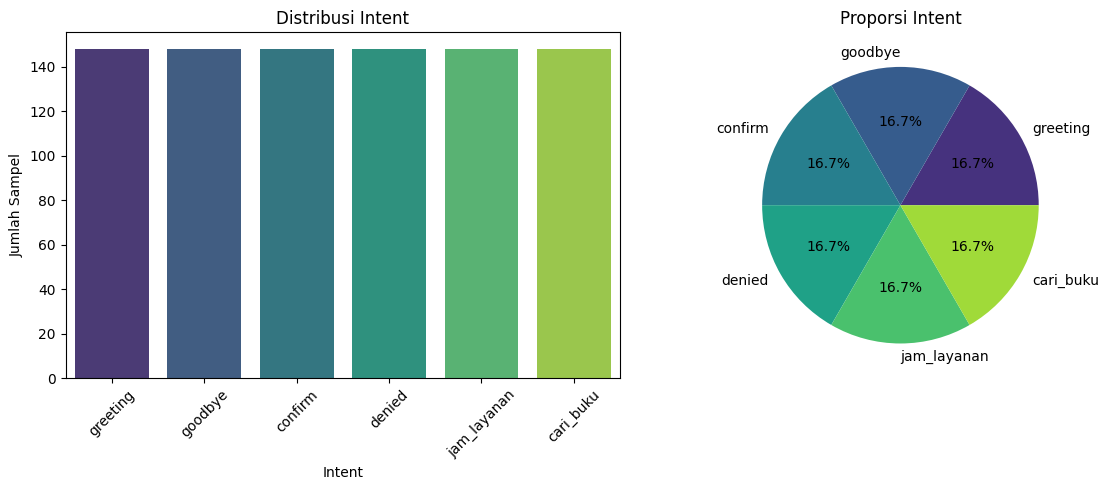

Memuat model IndoBERT...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model berhasil dimuat
Menyiapkan dataset...
Menggunakan class weights: [1.01139991 0.97152869 0.9870939  1.01139991 1.02828002 0.99239374]
Menggunakan device: cuda
Mulai pelatihan model...
Total epoch: 10, batch size: 16, learning rate: 2e-05, weight decay: 0.01
Menggunakan Focal Loss dengan gamma=2.0

Epoch 1/10 - Training dimulai...


Epoch 1/10 - Validasi dimulai...


Epoch 1/10:
  Train Loss: 0.5323
  Val Loss: 0.1264, Val Accuracy: 91.10%
  Val F1: 0.9125, Val Precision: 0.9214, Val Recall: 0.9110

Class-wise precision/recall/F1 setelah epoch 1:
              precision    recall  f1-score   support

           0     1.0000    0.9865    0.9932       148
           1     0.8205    0.8649    0.8421       148
           2     0.9470    0.8446    0.8929       148
           3     0.9919    0.8311    0.9044       148
           4     0.7688    0.9662    0.8563       148
           5     1.0000    0.9730    0.9863       148

    accuracy                         0.9110       888
   macro avg     0.9214    0.9110    0.9125       888
weighted avg     0.9214    0.9110    0.9125       888

Menyimpan model terbaik ke /content/drive/MyDrive/RusdiIntent3

Epoch 2/10 - Training dimulai...


Epoch 2/10 - Validasi dimulai...


Epoch 2/10:
  Train Loss: 0.1197
  Val Loss: 0.0819, Val Accuracy: 95.72%
  Val F1: 0.9573, Val Precision: 0.9587, Val Recall: 0.9572

Class-wise precision/recall/F1 setelah epoch 2:
              precision    recall  f1-score   support

           0     0.9932    0.9932    0.9932       148
           1     0.8882    0.9662    0.9256       148
           2     0.9400    0.9527    0.9463       148
           3     0.9851    0.8919    0.9362       148
           4     0.9459    0.9459    0.9459       148
           5     1.0000    0.9932    0.9966       148

    accuracy                         0.9572       888
   macro avg     0.9587    0.9572    0.9573       888
weighted avg     0.9587    0.9572    0.9573       888

Menyimpan model terbaik ke /content/drive/MyDrive/RusdiIntent3

Epoch 3/10 - Training dimulai...


Epoch 3/10 - Validasi dimulai...


Epoch 3/10:
  Train Loss: 0.0465
  Val Loss: 0.0702, Val Accuracy: 96.62%
  Val F1: 0.9662, Val Precision: 0.9666, Val Recall: 0.9662

Class-wise precision/recall/F1 setelah epoch 3:
              precision    recall  f1-score   support

           0     1.0000    0.9932    0.9966       148
           1     0.9580    0.9257    0.9416       148
           2     0.9290    0.9730    0.9505       148
           3     0.9533    0.9662    0.9597       148
           4     0.9589    0.9459    0.9524       148
           5     1.0000    0.9932    0.9966       148

    accuracy                         0.9662       888
   macro avg     0.9666    0.9662    0.9662       888
weighted avg     0.9666    0.9662    0.9662       888

Menyimpan model terbaik ke /content/drive/MyDrive/RusdiIntent3

Epoch 4/10 - Training dimulai...


Epoch 4/10 [Training]:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 233/278 [01:24<00:16,  2.77it/s, loss=0.0001]

In [ ]:
# Cell 13: Jalankan pipeline (uncomment untuk menjalankan)

model, tokenizer, intent_classes, label_encoder = run_full_pipeline_enhanced(
    use_drive=True,               # Whether to use Google Drive for storage
    percentile=95,                # Percentile for OOD threshold
    ood_method='combined',        # OOD detection method ('msp', 'energy', or 'combined')
    split_dataset="no",           # "yes" for splitting train.csv, "no" for separate files
    val_split=0.18                 # Validation split ratio if split_dataset="yes"
)


# Cell 14: Jalankan demo prediksi (uncomment untuk menjalankan)


In [ ]:
# @title Teks judul default
test_sentences = [
    # GREETING
    "Halo, selamat pagi!",
    "Apa kabar?",
    "Hai, bot!",
    "Permisi, boleh bertanya?",
    "Yo, ada orang di sana?",

    # GOODBYE
    "Terima kasih, sampai jumpa.",
    "Ok, saya pergi dulu.",
    "Sampai nanti!",
    "Dadah, bot.",
    "Aku akan kembali nanti.",

    # CONFIRM
    "Iya, benar.",
    "Betul sekali.",
    "Ya, saya setuju.",
    "Tentu saja.",
    "Itu yang saya maksud.",

    # DENIED
    "Tidak, bukan itu.",
    "Salah.",
    "Bukan, maksud saya yang lain.",
    "Enggak.",
    "Saya tidak yakin dengan itu.",

    # AMBIGUOUS (bisa mengecoh)
    "Saya rasa tidak perlu, tapi ya juga boleh.",
    "Mungkin... tapi entahlah.",
    "Terserah kamu aja deh.",
    "Boleh iya, boleh juga tidak.",
    "Ya tapi tidak juga sih...",
    "p",
    "test",
    "y",
    "g",
    "N"
]


In [ ]:
# @title Teks judul default
# If you want to load an existing model and run predictions
run_prediction_demo_enhanced(
    model_path=MODEL_SAVE_PATH,  # Your MODEL_SAVE_PATH
    method='combined',  # Which OOD detection method to use
    test_texts=test_sentences
)

Memuat model dari /content/drive/MyDrive/RusdiIntent2...
Intent yang didukung: cari_buku, confirm, denied, goodbye, greeting, jam_layanan
OOD thresholds loaded: Energy=-3.8913, MSP=0.6353
Menggunakan metode deteksi OOD: combined

Demo Prediksi Intent dengan Enhanced OOD Detection:

Memprediksi 30 contoh teks:
----------------------------

Contoh #1: "Halo, selamat pagi!"
‚úì Intent terdeteksi: greeting (confidence: 0.9638)

Top 3 intent:
  1. greeting: 0.9638
  2. goodbye: 0.0171
  3. denied: 0.0062

Detail OOD detection:
  Energy-based: In-Distribution (-4.3822)
  MSP-based: In-Distribution (0.9638)
  Final decision: In-Distribution

Contoh #2: "Apa kabar?"
‚úì Intent terdeteksi: greeting (confidence: 0.9528)

Top 3 intent:
  1. greeting: 0.9528
  2. jam_layanan: 0.0209
  3. cari_buku: 0.0101

Detail OOD detection:
  Energy-based: In-Distribution (-4.1846)
  MSP-based: In-Distribution (0.9528)
  Final decision: In-Distribution

Contoh #3: "Hai, bot!"
‚úì Intent terdeteksi: greeting (c

In [4]:
# @title Dataset Augmentation for Indonesian NLP
import pandas as pd
import random
import re
import nltk
import torch
import time
import os
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from deep_translator import GoogleTranslator
from collections import defaultdict, Counter
from tqdm import tqdm

# Download WordNet data (if not already downloaded)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# =========[ KONFIGURASI ]=========
INPUT_FILE = "/content/rusdi-prototype-1/train.xlsx"  # @param {type:"string"} Bisa CSV atau XLSX
OUTPUT_FILE = "train.csv"  # @param {type:"string"} Nama file output
DATA_TYPE = "train" # @param ["train", "val", "test"]
TARGET_SAMPLES_PER_CLASS = 800    # @param {type:"integer"} Target jumlah sampel per kelas
USE_PARAPHRASE_MODEL = True       # @param {type:"boolean"} Aktifkan atau matikan paraphrase
USE_BACK_TRANSLATION = False       # @param {type:"boolean"} Aktifkan atau matikan back-translation
MIN_AUGMENTATIONS_PER_SAMPLE = 1  # @param {type:"integer"} Minimum augmentasi per sampel asli
MAX_AUGMENTATIONS_PER_SAMPLE = 10  # @param {type:"integer"} Maximum augmentasi per sampel asli
BATCH_SIZE = 16                   # @param {type:"integer"} Untuk batch processing

# =========[ IMPROVED SYNONYM DICTIONARY ]=========
# Kamus sinonim Indonesia untuk kata-kata umum
id_synonyms = {
    # Kata-kata terkait sapaan
    "saya": ["aku", "gue", "gua", "hamba", "beta"],
    "kamu": ["anda", "engkau", "kalian", "elu", "dikau"],
    "hai": ["halo", "hello", "hi", "hey", "hola"],
    "selamat": ["slamat", "met", "congratz"],
    "pagi": ["morning", "subuh"],
    "siang": ["dzuhur", "sore"],
    "malam": ["malem", "night"],

    # Kata-kata umum
    "tidak": ["tak", "tiada", "bukan", "enggak", "nggak", "gak", "kagak"],
    "iya": ["ya", "yoi", "yup", "yo", "oke", "ok", "betul"],
    "bagaimana": ["gimana", "bagaimane", "gmn", "bgmn"],
    "mengapa": ["kenapa", "knp", "knapa", "ngapa"],
    "karena": ["sebab", "lantaran", "gara-gara"],
    "sangat": ["banget", "amat", "sekali", "sungguh"],
    "bisa": ["dapat", "mampu", "sanggup"],
    "mungkin": ["barangkali", "kali", "kayaknya", "kayanya"],
    "terima kasih": ["makasih", "tks", "thx", "thanks", "tengkyu", "tengkiu"],
    "tolong": ["bantu", "bantuin", "tlg", "help"],
    "mau": ["ingin", "pengen", "berkenan"],
    "pergi": ["berangkat", "cabut", "start", "jalan"],
    "lihat": ["tengok", "liat", "ngeliat", "mantau"],
    "cari": ["mencari", "nyari", "telusuri"]
}

# =========[ INTENT-SPECIFIC SLANG DICTIONARIES ]=========
# Kata gaul umum untuk semua intent
common_slang = {
    'tidak': 'gak',
    'iya': 'yoi',
    'terima kasih': 'makasih',
    'saya': 'gw',
    'kamu': 'lo',
    'sedang': 'lagi',
    'bagaimana': 'gimana',
    'begitu': 'gitu',
    'bisa': 'bsa',
    'akan': 'bakal',
    'untuk': 'buat',
    'tahu': 'tau',
    'apakah': 'apa',
    'mengapa': 'kenapa',
    'selamat': 'selamet',
    'dengan': 'dgn',
    'sangat': 'banget',
    'nigga': 'nigger',
    'coy': 'coek'
}

# Kamus kata gaul khusus intent
intent_slang = {
    'jam_layanan': {
        'perpustakaan': 'perpus',
        'buka': 'open',
        'tutup': 'close',
        'sampai': 'sampe',
        'jam': 'jm',
        'informasi': 'info',
        'hari ini': 'hr ini',
        'kapan': 'kpn',
        'jadwal': 'jdwl',
        'operasional': 'ops',
        'layanan': 'lyn',
        'masih': 'msih',
        'minggu': 'mg',
        'hari': 'hri',
        'pukul': 'pkl',
    },
    'cari_buku': {
        'mencari': 'nyari',
        'mau mencari': 'mau nyari',
        'ingin mencari': 'pengen nyari',
        'tolong carikan': 'cariin',
        'tolong bantu cari': 'bantuin cari',
        'mencarikan': 'cariin',
        'buku': 'book',
        'butuh': 'need',
        'melihat': 'liat',
        'daftar': 'list',
        'akses': 'akses',
        'temukan': 'nemu',
        'mencoba': 'nyoba',
        'mengakses': 'akses',
        'gunakan': 'make use',
        'fitur': 'fitr',
        'pencarian': 'search',
        'referensi': 'ref',
        'bantuan': 'bntuan',
        'dimana': 'dmn',
        'cek': 'check',
        'lihat-lihat': 'liat2',
        'cari': 'search',
        'mencari buku': 'nyari book',
    },
    'greeting': {
        'halo': 'haloo',
        'hai': 'hay',
        'hello': 'helo',
        'selamat pagi': 'slmt pagi',
        'selamat siang': 'slmt siang',
        'selamat sore': 'slmt sore',
        'selamat malam': 'slmt malam',
        'apa kabar': 'apa kbr',
        'assalamualaikum': 'asswrwb',
        'permisi': 'permizz',
        'hai bot': 'hey bot',
        'bot': 'bt',
        'selamat datang': 'slmt dtg',
        # Additional variations for greeting
        'halo selamat pagi': 'hai morning',
        'hai selamat siang': 'helo siang',
        'met pagi': 'morning',
        'pagi': 'pgi',
        'siang': 'siang boss',
    },
    'goodbye': {
        'terima kasih': 'makasih',
        'goodbye': 'gudbai',
        'makasih': 'mksh',
        'makasih ya': 'thx ya',
        'sampai jumpa': 'sampe jmpa',
        'dadah': 'daah',
        'bye': 'byee',
        'sampai nanti': 'sampe ntar',
        'see you': 'cu',
        'thanks': 'thx',
        'thank you': 'tq',
        'sekian': 'skian',
        'itu saja': 'itu aj',
        # Additional variations for goodbye
        'ok makasih': 'ok thx',
        'terima kasih banyak': 'thanks banget',
        'makasih atas bantuannya': 'thx for helping',
        'sampai bertemu lagi': 'see u later',
        'selamat tinggal': 'bye bye',
    },
    'confirm': {
        'betul': 'btl',
        'setuju': 'stju',
        'bener': 'bnr',
        'iya benar': 'ya bnr',
        'okey': 'okeyy',
        'ok deh': 'okedeh',
        # Additional variations for confirm
        'tentu saja': 'tentu',
        'saya setuju': 'aku setuju',
        'benar sekali': 'bener banget',
        'ya betul': 'yup betul',
        'tentu boleh': 'boleh dong',
        'setuju sekali': 'sangat setuju',
    },
    'denied': {
        'tidak mau': 'gak mau',
        'ga mau': 'gk mw',
        'tidak setuju': 'gak setuju',
        'saya tidak': 'aku ga',
        'nggak perlu': 'ga perlu',
        'ga usah': 'rasah',
        'tidak perlu': 'gak usah',
        'no': 'nope',
        # Additional variations for denied
        'saya tidak setuju': 'aku gak setuju',
        'tidak bisa': 'ga bisa',
        'tidak boleh': 'gak boleh',
        'jangan': 'jgn',
        'maaf tidak': 'sorry no',
        'tidak begitu': 'gak gitu',
    }
}

# =========[ PHONETIC AUGMENTATION DICTIONARY ]=========
phonetic_dict = {
        # Greeting related
        "saya": ["sy", "saia", "ane", "ana", "w", "gw", "q", "aq"],
        "kamu": ["km", "kamyu", "u", "lo", "lu", "l", "ngana", "sampeyan", "antum", "ente"],
        "halo": ["hlo", "hallo", "helo", "haloo", "hellow", "hy", "hyy", "p", "ping"],
        "selamat": ["slmt", "slamat", "met", "slam"],
        "pagi": ["pgi", "morning", "pg", "subuh"],
        "siang": ["siang", "afternoon", "siank", "siyang"],
        "malam": ["mlm", "malem", "mlem", "night", "evening", "mlem", "mlm"],
        "apa": ["ap", "ape", "apah", "pa"],
        "kabar": ["kbr", "kabare", "kbar", "kabbar"],
        "gimana": ["gmn", "bgmn", "gmana", "gimane", "gmn"],

        # Goodbye related
        "sampai": ["smp", "sampe", "smpe", "smpei", "sampeyan"],
        "jumpa": ["jpa", "jmpa", "ktmu", "jumpe"],
        "dadah": ["byebye", "bye", "bay", "byee", "bbye", "bye2", "dadah"],
        "pamit": ["pmt", "pamitt", "off", "out", "cabut", "cbut"],
        "tinggal": ["tgl", "tnggal", "tinggel", "tggal", "tinggelin"],
        "duluan": ["dlu", "duluan", "dluan", "dluan ya", "ahead"],
        "pergi": ["pgi", "pegi", "prgi", "out", "keluar"],
        "pulang": ["plg", "plng", "balik", "blk", "mudik"],

        # Confirm related
        "ya": ["y", "yah", "iye", "yoi", "yups", "yes", "yess", "yesss", "okey", "okeh", "oks"],
        "setuju": ["stju", "acc", "accept", "approved", "approve", "deal", "oke", "ok", "sip"],
        "benar": ["bnr", "bner", "bener", "bnr", "yoi", "correct"],
        "sudah": ["sdh", "dah", "udh", "done", "wes", "uwes", "udah", "sdah"],
        "bisa": ["bs", "bsa", "biza", "bsa", "biza", "ok"],
        "pasti": ["pst", "psti", "pastii", "sure", "certain"],
        "siap": ["sp", "ready", "sip", "sp", "roger", "on", "online"],
        "jadi": ["jd", "jdi", "jdnya", "jdiin", "proceed"],
        "lanjut": ["lnjt", "lanjt", "next", "go"],
        "mantap": ["mntap", "mantab", "mntb", "top", "mantul", "josss", "kerennn"],
        "bagus": ["bgs", "bgus", "nice", "naiss", "keren", "top"],

        # Denied related
        "tidak": ["tdk", "gak", "ga", "g", "nggak", "ngga", "nope", "no", "kagak", "kaga", "kgk"],
        "jangan": ["jgn", "jngn", "don't", "dont", "jgn", "ga usah", "tdk usah", "gausa", "gausah"],
        "belum": ["blm", "blom", "belom", "not yet", "durung", "durong", "belm"],
        "batal": ["btl", "cancel", "cansel", "urungkan", "batalin", "gajadi"],
        "maaf": ["sorry", "sori", "maf", "maap", "maaaaf", "mrff", "sry", "srry"],
        "menolak": ["tlk", "reject", "decline", "dtolak", "nolak", "gak mau", "gamau"],
        "mustahil": ["impossible", "ga mungkin", "g mungkin", "tdk mungkin", "gak bs"],
        "salah": ["slh", "wrong", "error", "eror", "salh", "fail"],
        "gagal": ["ggl", "fail", "failed", "error", "gagak", "failll"],

        # Common words
        "terima": ["trma", "thanks", "thx", "trims", "tq", "tyvm", "makasih", "mksih"],
        "kasih": ["ksh", "ksih", "thx", "makasih", "mksih", "thanks"],
        "tolong": ["tlng", "help", "tlg", "tulung", "bantu", "bantuin"],
        "please": ["plz", "plis", "pliss", "plisss", "pliissss", "tolong"],
        "besok": ["bsk", "bsok", "besok", "tmrw", "esok", "besuk"],
        "waktu": ["wkt", "waktu", "time", "tm", "jam"],
        "cukup": ["ckp", "enough", "cukuppp", "cukups", "ckup"],
        "melihat": ["lihat", "liat", "look", "see", "watching", "ngeliat"],
        "alasan": ["alsan", "reason", "why", "alesan", "alsn"],
        "untuk": ["utk", "buat", "bwt", "4", "tuk", "2", "to"],
        "melakukan": ["lakukan", "do", "lakuin", "melakuin", "ngerjain"],
        "ini": ["ni", "this", "these", "iki", "nih", "ne"],
        "kita": ["kta", "we", "us", "w", "kt"],
        "hari": ["hr", "day", "hri", "days", "dayy", "harii"],
        "bro": ["broh", "brow", "brother", "mas", "bang", "bor", "omm"],
        "sis": ["sist", "sister", "mbak", "mba", "nte", "ceu", "teh"]
    }

# =========[ READ & VALIDATE FILE ]=========
def read_dataset(file_path):
    """Membaca dataset dari file CSV atau XLSX"""
    print(f"Loading dataset: {file_path}")

    file_ext = os.path.splitext(file_path)[1].lower()

    if file_ext == '.xlsx':
        print(f"Detected Excel file: {file_path}")
        df = pd.read_excel(file_path)
        # Konversi ke CSV untuk kompatibilitas
        csv_path = file_path.replace('.xlsx', '.csv')
        df.to_csv(csv_path, index=False)
        print(f"Converted Excel file to CSV: {csv_path}")
    elif file_ext == '.csv':
        print(f"Detected CSV file: {file_path}")
        df = pd.read_csv(file_path)
    else:
        raise ValueError(f"Format file tidak didukung: {file_ext}. Harap gunakan file CSV atau XLSX.")

    df = df.dropna()
    print(f"Dataset dimuat dengan {len(df)} baris")

    return df

# =========[ INITIALIZE PARAPHRASE MODEL IF NEEDED ]=========
def initialize_paraphrase_model():
    """Initialize paraphrase model if enabled"""
    if USE_PARAPHRASE_MODEL:
        print("Loading paraphrase model...")
        start_time = time.time()
        tokenizer = AutoTokenizer.from_pretrained("Wikidepia/IndoT5-base-paraphrase")
        model = AutoModelForSeq2SeqLM.from_pretrained("Wikidepia/IndoT5-base-paraphrase")

        # Move model to GPU if available
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = model.to(device)
        print(f"Model loaded in {time.time() - start_time:.2f} seconds. Using device: {device}")
        return model, tokenizer
    return None, None

# =========[ AUGMENTATION METHODS ]=========
def get_better_synonym(word):
    """Get synonym from custom dictionary or return the original word"""
    word_lower = word.lower()
    if word_lower in id_synonyms:
        synonyms = id_synonyms[word_lower]
        return random.choice(synonyms)
    return word

def replace_with_synonym(sentence):
    """Replace words with synonyms while preserving capitalization"""
    words = sentence.split()
    new_words = []

    for word in words:
        synonym = get_better_synonym(word)
        # Preserve capitalization
        if word and word[0].isupper() and synonym:
            synonym = synonym[0].upper() + synonym[1:]
        new_words.append(synonym)

    return " ".join(new_words)

def back_translate(sentence):
    """Translate to English and back to Indonesian"""
    if not USE_BACK_TRANSLATION:
        return sentence

    try:
        # First to English
        translated = GoogleTranslator(source='id', target='en').translate(sentence)
        # Then back to Indonesian
        back_translated = GoogleTranslator(source='en', target='id').translate(translated)

        # Only return if result is different but not completely unrelated
        if back_translated != sentence and len(back_translated.split()) >= len(sentence.split()) * 0.5:
            return back_translated
        return sentence
    except Exception:
        return sentence

def add_typo(sentence):
    """Add a single typo by replacing a character"""
    chars = list(sentence)
    if len(chars) > 3:
        idx = random.randint(0, len(chars) - 1)
        if chars[idx].isalpha():  # Only replace letters
            chars[idx] = random.choice("abcdefghijklmnopqrstuvwxyz")
    return "".join(chars)

def random_deletion(sentence, p=0.2):
    """Delete words with probability p"""
    words = sentence.split()
    if len(words) <= 3:  # Don't delete from very short sentences
        return sentence

    new_words = []
    for word in words:
        if random.uniform(0, 1) > p:
            new_words.append(word)

    # Make sure we don't delete everything
    if not new_words:
        return sentence

    return " ".join(new_words)

def random_swap(sentence, n=1):
    """Swap n pairs of words"""
    words = sentence.split()
    if len(words) < 2:
        return sentence

    for _ in range(min(n, len(words)//2)):  # Ensure we don't try too many swaps
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]

    return " ".join(words)

def phonetic_augmentation(sentence):
    """Apply phonetic substitutions common in Indonesian chat"""
    words = sentence.split()
    new_words = []

    for word in words:
        word_lower = word.lower()
        if word_lower in phonetic_dict:
            new_word = random.choice(phonetic_dict[word_lower])
            # Preserve capitalization
            if word and word[0].isupper():
                new_word = new_word[0].upper() + new_word[1:]
            new_words.append(new_word)
        else:
            new_words.append(word)

    return " ".join(new_words)

def apply_slang_typo(text, intent, intensity=1.0):
    """Apply slang replacements with controllable intensity"""
    # Combine common slang with intent-specific slang
    slang_dict = common_slang.copy()
    if intent in intent_slang:
        slang_dict.update(intent_slang[intent])

    # Create regex patterns from the slang dictionary
    patterns = {
        re.compile(rf'\b{k}\b', re.IGNORECASE): v for k, v in slang_dict.items()
    }

    # Apply only some of the patterns based on intensity
    patterns_to_use = random.sample(
        list(patterns.items()),
        k=int(len(patterns) * min(1.0, intensity * 0.7))
    )

    for pattern, replacement in patterns_to_use:
        text = pattern.sub(replacement, text)

    return text

def character_noise(text, intensity=1.0):
    """Add typos like character swaps, insertions, deletions"""
    chars = list(text)
    swap_prob = min(0.1, intensity * 0.05)  # Scale probability with intensity

    # Character swaps
    for i in range(len(chars)-1):
        if random.random() < swap_prob:
            chars[i], chars[i+1] = chars[i+1], chars[i]

    return ''.join(chars)

def add_common_phrase(sentence):
    """Add a common Indonesian chat phrase"""
    common_phrases = ["sih", "ya", "dong", "cuy", "bro", "lah", "plis", "eh",
                    "nih", "gitu", "kan", "yah", "deh", "banget"]
    return sentence + " " + random.choice(common_phrases)

def short_text_augmentation(text, intent):
    """Special augmentation for very short texts like greetings and goodbyes"""
    # For very short texts, add filler words or expressions
    fillers = {
        'greeting': ['', ' ya', ' kak', ' min', ' gan', ' bro', ' sis', ' admin', '!', '!!'],
        'goodbye': ['', ' ya', ' kak', ' min', ' sekali lagi', ' semuanya', '!', '!!'],
        'confirm': ['', ' kok', ' dong', ' banget', ' sih', ' tentu', ' lah', '!', '!!'],
        'denied': ['', ' sih', ' kok', ' ah', ' deh', ' lah', '!', '!!'],
    }

    if intent in fillers and len(text.split()) <= 3:
        # Add 0-2 random fillers
        num_fillers = random.randint(0, 2)
        for _ in range(num_fillers):
            text += random.choice(fillers[intent])

    return text

def validate_augmentation(original, augmented):
    """Validate if augmentation is reasonable"""
    # Check if augmentation is too different
    if len(augmented.split()) < len(original.split()) * 0.5:
        return False

    # Check if augmentation is just the original
    if augmented.lower() == original.lower():
        return False

    # Check if augmentation contains too many non-Indonesian characters
    non_indo_pattern = re.compile(r'[^a-zA-Z0-9\s.,?!\'"-:;()[\]{}]')
    if len(non_indo_pattern.findall(augmented)) > 2:
        return False

    return True

def batch_paraphrase(model, tokenizer, sentences, batch_size=BATCH_SIZE):
    """Process paraphrasing in batches"""
    if not sentences or model is None or tokenizer is None:
        return []

    device = next(model.parameters()).device
    results = []

    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        inputs = tokenizer(["paraphrase: " + text + " </s>" for text in batch],
                         padding='longest', truncation=True, max_length=128,
                         return_tensors="pt").to(device)

        with torch.no_grad():  # Disable gradient calculation for inference
            outputs = model.generate(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_length=128,
                do_sample=True,
                top_k=200,
                top_p=0.95,
                early_stopping=True,
                num_return_sequences=1
            )

        decoded = [tokenizer.decode(outputs[j], skip_special_tokens=True)
                  for j in range(len(outputs))]
        results.extend(decoded)

    return results

# Combined augmentation strategies
def augment_text(text, intent, intensity=1.0):
    """Apply multiple augmentation techniques based on class needs"""
    # Available methods
    methods = {
        'synonym': replace_with_synonym,
        'back_translate': back_translate,
        'typo': add_typo,
        'deletion': random_deletion,
        'swap': random_swap,
        'phonetic': phonetic_augmentation,
        'common_phrase': add_common_phrase,
        'slang': lambda t: apply_slang_typo(t, intent, intensity),
        'char_noise': lambda t: character_noise(t, intensity),
        'short_text': lambda t: short_text_augmentation(t, intent)
    }

    # Choose augmentation methods based on text length and intent
    text_length = len(text.split())

    if text_length <= 3:  # Very short text
        # For short texts, focus on slang and special augmentations
        method_choices = ['slang', 'slang', 'phonetic', 'short_text', 'char_noise', 'synonym']
        num_methods = min(3, int(intensity * 3))
    else:  # Longer text
        method_choices = ['slang', 'synonym', 'phonetic', 'back_translate', 'deletion', 'swap', 'char_noise', 'common_phrase']
        num_methods = min(3, int(intensity * 2))

    # Sample methods
    selected_methods = random.sample(method_choices, k=num_methods)

    # Apply selected methods in sequence
    result = text
    for method_name in selected_methods:
        method = methods[method_name]
        result = method(result)

    return result

def augment_data(text, intent):
    """Generate multiple augmentations for a text"""
    methods = [
        replace_with_synonym,
        back_translate,
        add_typo,
        random_deletion,
        random_swap,
        phonetic_augmentation,
        add_common_phrase,
        lambda t: apply_slang_typo(t, intent, 1.0),
        lambda t: character_noise(t, 1.0),
        lambda t: short_text_augmentation(t, intent)
    ]

    augmented = set()
    for method in methods:
        try:
            result = method(text)
            if validate_augmentation(text, result):
                augmented.add(result)
        except Exception as e:
            print(f"Error applying {method.__name__}: {str(e)}")
            continue

    return list(augmented)

def balance_samples(results_by_intent, target_samples_per_class, original_counts):
    """
    Balance samples by intent, ensuring a good mix of original and augmented data:
    1. Keep all original samples
    2. Add augmentations until target is reached
    3. Limit excess samples if over target
    """
    balanced_results = defaultdict(list)

    # For each intent
    for intent, samples in results_by_intent.items():
        # Count of original samples for this intent
        orig_count = original_counts.get(intent, 0)

        # Current total count
        current_count = len(samples)

        if current_count <= target_samples_per_class:
            # If sample count is below target, use all samples
            balanced_results[intent] = samples
        else:
            # If over target, balance original vs augmented
            # Ensure we keep all original data (priority)
            original_data = samples[:orig_count]

            # Add original data
            balanced_results[intent].extend(original_data)

            # Calculate how many augmented samples we can add
            remaining_slots = target_samples_per_class - orig_count

            if remaining_slots > 0:
                # Get augmented samples (everything after original data)
                augmented_data = samples[orig_count:]
                # Randomize selection
                random.shuffle(augmented_data)
                # Add only what we need to reach target
                balanced_results[intent].extend(augmented_data[:remaining_slots])

    return balanced_results

def plot_distribution(data, title):
    """Plot distribution of samples by intent"""
    plt.figure(figsize=(10, 5))
    data['intent'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel("Intent")
    plt.ylabel("Jumlah Sampel")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# =========[ MAIN PROCESS ]=========
def main():
    """Main process for dataset augmentation"""
    # Set up file paths based on chosen data type
    if DATA_TYPE == "train":
        input_file = INPUT_FILE
        output_file = OUTPUT_FILE
    elif DATA_TYPE == "val":
        # If different paths needed for validation
        input_file = INPUT_FILE.replace("train", "val")
        output_file = OUTPUT_FILE.replace("train", "val")
    elif DATA_TYPE == "test":
        # If different paths needed for test
        input_file = INPUT_FILE.replace("train", "test")
        output_file = OUTPUT_FILE.replace("train", "test")
    else:
        input_file = INPUT_FILE
        output_file = OUTPUT_FILE

    # Read the dataset
    df = read_dataset(input_file)

    # Initialize paraphrase model if enabled
    model, tokenizer = initialize_paraphrase_model()

    # Count original samples per intent
    intent_counts = Counter(df['intent'])
    print("Original class distribution:")
    for intent, count in intent_counts.items():
        print(f"  {intent}: {count}")

    # Calculate augmentation factors for balancing
    augmentation_factors = {}
    for intent, count in intent_counts.items():
        if count >= TARGET_SAMPLES_PER_CLASS:
            augmentation_factors[intent] = 1  # Minimum factor
        else:
            factor = max(1, min(10, TARGET_SAMPLES_PER_CLASS / count))
            augmentation_factors[intent] = factor

    print("\nAugmentation factors:")
    for intent, factor in augmentation_factors.items():
        print(f"  {intent}: {factor:.2f}x")

    # Start augmentation process
    print("Starting balanced augmentation...")
    start_time = time.time()

    augmented_results = defaultdict(list)
    paraphrase_candidates = defaultdict(list)

    # First, add all original data
    for _, row in df.iterrows():
        intent = row['intent']
        text = row['text']
        augmented_results[intent].append(text)

    # Then determine augmentation targets for each intent
    for intent, factor in augmentation_factors.items():
        original_count = intent_counts[intent]
        intent_df = df[df['intent'] == intent]

        for _, row in tqdm(intent_df.iterrows(), desc=f"Augmenting '{intent}'", total=len(intent_df)):
            text = row['text']

            # Calculate needed augmentations for this sample
            num_augmentations = max(
                MIN_AUGMENTATIONS_PER_SAMPLE,
                min(MAX_AUGMENTATIONS_PER_SAMPLE, int(factor * 2))
            )

            # Regular augmentations
            for _ in range(num_augmentations):
                # Higher intensity for smaller classes
                intensity = 1.0 + (factor - 1) * 0.5  # Scale 1.0-5.0 based on factor
                aug_text = augment_text(text, intent, intensity)

                if aug_text.lower() != text.lower():
                    augmented_results[intent].append(aug_text)

            # Add sample for paraphrasing if enabled
            if USE_PARAPHRASE_MODEL and model is not None:
                # More paraphrasing for under-represented classes
                paraphrase_prob = min(0.8, factor * 0.2)
                if random.random() < paraphrase_prob:
                    paraphrase_candidates[intent].append(text)

    # Process paraphrases in batches by intent
    if USE_PARAPHRASE_MODEL and model is not None:
        for intent, sentences in paraphrase_candidates.items():
            if not sentences:
                continue

            print(f"Paraphrasing {len(sentences)} sentences for intent '{intent}'...")
            paraphrased = batch_paraphrase(model, tokenizer, sentences)

            # Add paraphrased results
            for original, paraphrase in zip(sentences, paraphrased):
                if original.lower() != paraphrase.lower():
                    augmented_results[intent].append(paraphrase)

    # Balance class distribution
    print("Balancing class distribution...")
    balanced_results = balance_samples(augmented_results, TARGET_SAMPLES_PER_CLASS, intent_counts)

    # Combine all results
    final_results = []
    for intent, texts in balanced_results.items():
        for text in texts:
            final_results.append((intent, text))

    # Save results
    print("Final class distribution:")
    result_counts = defaultdict(int)
    for intent, _ in final_results:
        result_counts[intent] += 1

    for intent, count in result_counts.items():
        print(f"  {intent}: {count}")

    aug_df = pd.DataFrame(final_results, columns=['intent', 'text'])
    aug_df.drop_duplicates(subset=['text'], keep='first', inplace=True)
    aug_df.to_csv(output_file, index=False)

    print(f"[‚úì] Selesai dalam {time.time() - start_time:.2f} detik!")
    print(f"Original: {len(df)} | Total setelah augmentasi: {len(aug_df)} ‚Üí {output_file}")

    # Plot distributions
    print("\nüìä Distribusi Sebelum Augmentasi:")
    df_original = df[['text', 'intent']]
    plot_distribution(df_original, "Distribusi Intent Sebelum Augmentasi")

    print("\nüìä Distribusi Setelah Augmentasi:")
    plot_distribution(aug_df, "Distribusi Intent Setelah Augmentasi (Seimbang)")

if __name__ == "__main__":
    main()

Loading dataset: /content/rusdi-prototype-1/train.xlsx
Detected Excel file: /content/rusdi-prototype-1/train.xlsx
Converted Excel file to CSV: /content/rusdi-prototype-1/train.csv
Dataset dimuat dengan 697 baris
Loading paraphrase model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/777k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Model loaded in 57.48 seconds. Using device: cuda
Original class distribution:
  greeting: 107
  goodbye: 112
  confirm: 119
  denied: 119
  jam_layanan: 120
  cari_buku: 120

Augmentation factors:
  greeting: 7.48x
  goodbye: 7.14x
  confirm: 6.72x
  denied: 6.72x
  jam_layanan: 6.67x
  cari_buku: 6.67x
Starting balanced augmentation...



Augmenting 'greeting': 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 107/107 [00:00<00:00, 1392.59it/s]

Augmenting 'goodbye': 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112/112 [00:00<00:00, 1549.07it/s]

Augmenting 'confirm': 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:00<00:00, 1643.54it/s]

Augmenting 'denied': 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119/119 [00:00<00:00, 1740.50it/s]

Augmenting 'jam_layanan': 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 120/120 [00:00<00:00, 1646.82it/s]

Augmenting 'cari_buku': 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 120/120 [00:00<00:00, 1440.76it/s]
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:676: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


Paraphrasing 83 sentences for intent 'greeting'...
Paraphrasing 90 sentences for intent 'goodbye'...
Paraphrasing 101 sentences for intent 'confirm'...
Paraphrasing 97 sentences for intent 'denied'...
Paraphrasing 93 sentences for intent 'jam_layanan'...
Paraphrasing 96 sentences for intent 'cari_buku'...
Balancing class distribution...
Final class distribution:
  greeting: 800
  goodbye: 800
  confirm: 800
  denied: 800
  jam_layanan: 800
  cari_buku: 800
[‚úì] Selesai dalam 15.65 detik!
Original: 697 | Total setelah augmentasi: 4436 ‚Üí train.csv

üìä Distribusi Sebelum Augmentasi:



üìä Distribusi Setelah Augmentasi:


In [ ]:
!pip install transformers nltk fuzzywuzzy python-Levenshtein

In [13]:
# @title augmentasi
import pandas as pd
import random
import nltk
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from collections import defaultdict
import re

# =========[ IMPROVED SYNONYM DICTIONARY ]=========
# Custom Indonesian synonym dictionary for common words
id_synonyms = {
    # Greeting related words
    "saya": ["aku", "gue", "gua", "hamba", "beta"],
    "kamu": ["anda", "engkau", "kalian", "elu", "dikau"],
    "halo": ["hai", "hey", "hi", "selamat jumpa", "salam", "assalamualaikum"],
    "selamat": ["bahagia", "sukses", "sejahtera"],
    "senang": ["bahagia", "gembira", "ceria", "suka", "girang"],
    "bertemu": ["berjumpa", "ketemu", "bersua", "menjumpai"],
    "rindu": ["kangen", "merindukan", "nostalgia", "damba"],

    # Goodbye related words
    "sampai": ["hingga", "sampai dengan", "sehingga"],
    "jumpa": ["ketemu", "bersua", "bertemu", "berjumpa"],
    "pamit": ["izin", "permisi", "undur diri", "mohon diri"],
    "tinggal": ["berdiam", "bermukim", "menetap"],
    "pergi": ["berangkat", "meninggalkan", "menuju", "bepergian"],
    "pulang": ["kembali", "balik", "mudik", "kembali ke rumah"],

    # Confirm related words
    "ya": ["iya", "benar", "betul", "sungguh", "memang"],
    "setuju": ["sepakat", "akur", "mufakat", "sependapat", "sepaham"],
    "benar": ["betul", "tepat", "akurat", "sahih", "valid"],
    "sudah": ["telah", "usai", "selesai", "rampung", "beres"],
    "bisa": ["mampu", "dapat", "sanggup", "berdaya", "berkemampuan"],
    "pasti": ["tentu", "yakin", "meyakinkan", "positif", "terang"],
    "siap": ["bersedia", "bersiap", "sedia", "bersiaga", "tersedia"],
    "jadi": ["menjadi", "terlaksana", "terjadi", "berlangsung"],
    "lanjut": ["terus", "melanjutkan", "meneruskan", "berlanjut"],
    "mantap": ["hebat", "bagus", "keren", "mengagumkan", "luar biasa"],
    "bagus": ["baik", "indah", "elok", "cantik", "menarik"],
    "tentu": ["pasti", "yakin", "meyakinkan", "terang", "jelas"],

    # Denied related words
    "tidak": ["bukan", "tiada", "tak", "belum", "tanpa"],
    "jangan": ["larang", "cegah", "hindari", "batalkan"],
    "belum": ["masih", "sedang", "tengah", "dalam proses"],
    "batal": ["urung", "gagal", "berhenti", "dibatalkan", "tak jadi"],
    "maaf": ["ampun", "pemaafan", "pengampunan", "mohon maaf"],
    "menolak": ["menampik", "mengelak", "menghindar", "melarang"],
    "mustahil": ["tidak mungkin", "tidak bisa", "sulit", "sukar"],
    "salah": ["keliru", "alpa", "sesat", "khilaf", "menyimpang"],
    "gagal": ["batal", "tidak berhasil", "kalah", "tumbang"],
    "susah": ["sulit", "rumit", "kompleks", "tidak mudah", "berat"],

    # Common words
    "tolong": ["bantu", "sokong", "dukung", "membantu"],
    "besok": ["esok", "hari berikutnya", "keesokan hari"],
    "cukup": ["memadai", "layak", "pantas", "patut", "lumayan"],
    "untuk": ["bagi", "demi", "guna", "buat", "kepada"],
    "ini": ["hal ini", "hal tersebut", "sekarang", "saat ini"],
    "kita": ["kami", "kamu dan saya", "kelompok kita", "tim kita"],
    "fix": ["tetap", "pasti", "permanen", "tidak berubah"],
    "nigga": ["nigger", "hitam", "negro"]

}

# =========[ FILE PATHS ]=========
PilihData = "val"  # @param ["train","val"]
if PilihData == "train":
    file_path = "/content/rusdi-prototype-1/val.xlsx"
    csv_path = "/content/train.csv"
    output_path_balanced = "/content/train.csv"
elif PilihData == "val":
    file_path = "/content/val.csv"
    csv_path = "/content/val.csv"
    output_path_balanced = "/content/val.csv"

# =========[ READ & CONVERT XLSX ]=========
if file_path.endswith(".xlsx"):
    df = pd.read_excel(file_path)
    df.to_csv(csv_path, index=False)
    print(f"‚úÖ File dikonversi ke CSV: {csv_path}")
else:
    df = pd.read_csv(file_path)

# =========[ AUGMENTATION METHODS ]=========

def get_better_synonym(word):
    """Get synonym from custom dictionary or return the original word"""
    word_lower = word.lower()
    if word_lower in id_synonyms:
        synonyms = id_synonyms[word_lower]
        return random.choice(synonyms)
    return word

def replace_with_synonym(sentence):
    """Replace words with synonyms while preserving capitalization"""
    words = sentence.split()
    new_words = []

    for word in words:
        synonym = get_better_synonym(word)
        # Preserve capitalization
        if word and word[0].isupper() and synonym:
            synonym = synonym[0].upper() + synonym[1:]
        new_words.append(synonym)

    return " ".join(new_words)

def back_translate(sentence):
    """Translate to English and back to Indonesian"""
    try:
        # First to English
        translated = GoogleTranslator(source='id', target='en').translate(sentence)
        # Then back to Indonesian
        back_translated = GoogleTranslator(source='en', target='id').translate(translated)

        # Only return if result is different but not completely unrelated
        if back_translated != sentence and len(back_translated.split()) >= len(sentence.split()) * 0.5:
            return back_translated
        return sentence
    except Exception:
        return sentence

def add_typo(sentence):
    """Add a single typo by replacing a character"""
    chars = list(sentence)
    if len(chars) > 3:
        idx = random.randint(0, len(chars) - 1)
        if chars[idx].isalpha():  # Only replace letters
            chars[idx] = random.choice("abcdefghijklmnopqrstuvwxyz")
    return "".join(chars)

def random_deletion(sentence, p=0.2):
    """Delete words with probability p"""
    words = sentence.split()
    if len(words) <= 3:  # Don't delete from very short sentences
        return sentence

    new_words = []
    for word in words:
        if random.uniform(0, 1) > p:
            new_words.append(word)

    # Make sure we don't delete everything
    if not new_words:
        return sentence

    return " ".join(new_words)

def random_swap(sentence, n=1):
    """Swap n pairs of words"""
    words = sentence.split()
    if len(words) < 2:
        return sentence

    for _ in range(min(n, len(words)//2)):  # Ensure we don't try too many swaps
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]

    return " ".join(words)

def phonetic_augmentation(sentence):
    """Apply phonetic substitutions common in Indonesian chat"""
    phonetic_dict = {
        # Greeting related
        "saya": ["sy", "saia", "ane", "ana", "w", "gw", "q", "aq"],
        "kamu": ["km", "kamyu", "u", "lo", "lu", "l", "ngana", "sampeyan", "antum", "ente"],
        "halo": ["hlo", "hallo", "helo", "haloo", "hellow", "hy", "hyy", "p", "ping"],
        "selamat": ["slmt", "slamat", "met", "slam"],
        "pagi": ["pgi", "morning", "pg", "subuh"],
        "siang": ["siang", "afternoon", "siank", "siyang"],
        "malam": ["mlm", "malem", "mlem", "night", "evening", "mlem", "mlm"],
        "apa": ["ap", "ape", "apah", "pa"],
        "kabar": ["kbr", "kabare", "kbar", "kabbar"],
        "gimana": ["gmn", "bgmn", "gmana", "gimane", "gmn"],

        # Goodbye related
        "sampai": ["smp", "sampe", "smpe", "smpei", "sampeyan"],
        "jumpa": ["jpa", "jmpa", "ktmu", "jumpe"],
        "dadah": ["byebye", "bye", "bay", "byee", "bbye", "bye2", "dadah"],
        "pamit": ["pmt", "pamitt", "off", "out", "cabut", "cbut"],
        "tinggal": ["tgl", "tnggal", "tinggel", "tggal", "tinggelin"],
        "duluan": ["dlu", "duluan", "dluan", "dluan ya", "ahead"],
        "pergi": ["pgi", "pegi", "prgi", "out", "keluar"],
        "pulang": ["plg", "plng", "balik", "blk", "mudik"],

        # Confirm related
        "ya": ["y", "yah", "iye", "yoi", "yups", "yes", "yess", "yesss", "okey", "okeh", "oks"],
        "setuju": ["stju", "acc", "accept", "approved", "approve", "deal", "oke", "ok", "sip"],
        "benar": ["bnr", "bner", "bener", "bnr", "yoi", "correct"],
        "sudah": ["sdh", "dah", "udh", "done", "wes", "uwes", "udah", "sdah"],
        "bisa": ["bs", "bsa", "biza", "bsa", "biza", "ok"],
        "pasti": ["pst", "psti", "pastii", "sure", "certain"],
        "siap": ["sp", "ready", "sip", "sp", "roger", "on", "online"],
        "jadi": ["jd", "jdi", "jdnya", "jdiin", "proceed"],
        "lanjut": ["lnjt", "lanjt", "next", "go"],
        "mantap": ["mntap", "mantab", "mntb", "top", "mantul", "josss", "kerennn"],
        "bagus": ["bgs", "bgus", "nice", "naiss", "keren", "top"],

        # Denied related
        "tidak": ["tdk", "gak", "ga", "g", "nggak", "ngga", "nope", "no", "kagak", "kaga", "kgk"],
        "jangan": ["jgn", "jngn", "don't", "dont", "jgn", "ga usah", "tdk usah", "gausa", "gausah"],
        "belum": ["blm", "blom", "belom", "not yet", "durung", "durong", "belm"],
        "batal": ["btl", "cancel", "cansel", "urungkan", "batalin", "gajadi"],
        "maaf": ["sorry", "sori", "maf", "maap", "maaaaf", "mrff", "sry", "srry"],
        "menolak": ["tlk", "reject", "decline", "dtolak", "nolak", "gak mau", "gamau"],
        "mustahil": ["impossible", "ga mungkin", "g mungkin", "tdk mungkin", "gak bs"],
        "salah": ["slh", "wrong", "error", "eror", "salh", "fail"],
        "gagal": ["ggl", "fail", "failed", "error", "gagak", "failll"],

        # Common words
        "terima": ["trma", "thanks", "thx", "trims", "tq", "tyvm", "makasih", "mksih"],
        "kasih": ["ksh", "ksih", "thx", "makasih", "mksih", "thanks"],
        "tolong": ["tlng", "help", "tlg", "tulung", "bantu", "bantuin"],
        "please": ["plz", "plis", "pliss", "plisss", "pliissss", "tolong"],
        "besok": ["bsk", "bsok", "besok", "tmrw", "esok", "besuk"],
        "waktu": ["wkt", "waktu", "time", "tm", "jam"],
        "cukup": ["ckp", "enough", "cukuppp", "cukups", "ckup"],
        "melihat": ["lihat", "liat", "look", "see", "watching", "ngeliat"],
        "alasan": ["alsan", "reason", "why", "alesan", "alsn"],
        "untuk": ["utk", "buat", "bwt", "4", "tuk", "2", "to"],
        "melakukan": ["lakukan", "do", "lakuin", "melakuin", "ngerjain"],
        "ini": ["ni", "this", "these", "iki", "nih", "ne"],
        "kita": ["kta", "we", "us", "w", "kt"],
        "hari": ["hr", "day", "hri", "days", "dayy", "harii"],
        "bro": ["broh", "brow", "brother", "mas", "bang", "bor", "omm"],
        "sis": ["sist", "sister", "mbak", "mba", "nte", "ceu", "teh"]
    }

    words = sentence.split()
    new_words = []

    for word in words:
        word_lower = word.lower()
        if word_lower in phonetic_dict:
            new_word = random.choice(phonetic_dict[word_lower])
            # Preserve capitalization
            if word and word[0].isupper():
                new_word = new_word[0].upper() + new_word[1:]
            new_words.append(new_word)
        else:
            new_words.append(word)

    return " ".join(new_words)

def add_common_phrase(sentence):
    """Add a common Indonesian chat phrase"""
    common_phrases = ["sih", "ya", "anjay", "dong", "cuy", "bro", "lah", "plis", "eh",
                      "nih", "gitu", "kan", "yah", "deh", "banget"]
    return sentence + " " + random.choice(common_phrases)

def validate_augmentation(original, augmented):
    """Validate if augmentation is reasonable"""
    # Check if augmentation is too different
    if len(augmented.split()) < len(original.split()) * 0.5:
        return False

    # Check if augmentation is just the original
    if augmented == original:
        return False

    # Check if augmentation contains too many non-Indonesian characters
    non_indo_pattern = re.compile(r'[^a-zA-Z0-9\s.,?!\'"-:;()[\]{}]')
    if len(non_indo_pattern.findall(augmented)) > 2:
        return False

    return True

# Combined augmentations
def augment_data(text):
    """Generate multiple augmentations for a text"""
    methods = [
        replace_with_synonym,
        back_translate,
        add_typo,
        random_deletion,
        random_swap,
        phonetic_augmentation,
        add_common_phrase
    ]

    augmented = set()
    for method in methods:
        try:
            result = method(text)
            if validate_augmentation(text, result):
                augmented.add(result)
        except Exception as e:
            print(f"Error applying {method.__name__}: {str(e)}")
            continue

    return list(augmented)

# =========[ BALANCED AUGMENTATION ]=========
target_aug_per_class = 95  # Can be changed (e.g., 100 augmented per class)
intent_buckets = defaultdict(list)

# Group original data by intent
for _, row in df.iterrows():
    intent_buckets[row['intent']].append(row['text'])

df_augmented_balanced = []

# Augment per class until target reached
for intent, texts in intent_buckets.items():
    current_aug_count = 0
    index = 0
    existing_aug_set = set()
    print(f"üîÑ Augmenting class '{intent}'...")

    # Limit iterations to prevent infinite loops
    max_iterations = 1000
    iterations = 0

    while current_aug_count < target_aug_per_class and iterations < max_iterations:
        original_text = texts[index % len(texts)]
        augmented_variants = augment_data(original_text)

        for aug in augmented_variants:
            if aug not in existing_aug_set:
                df_augmented_balanced.append([aug, intent])
                existing_aug_set.add(aug)
                current_aug_count += 1
                if current_aug_count >= target_aug_per_class:
                    break

        index += 1
        iterations += 1

    print(f"  ‚úì Added {current_aug_count} augmentations for '{intent}'")

# Combine original + augmented
df_original = df[['text', 'intent']]
df_augmented_balanced = pd.DataFrame(df_augmented_balanced, columns=["text", "intent"])
df_final = pd.concat([df_original, df_augmented_balanced], ignore_index=True)

# Save to CSV
df_final.to_csv(output_path_balanced, index=False)
print(f"\n‚úÖ Augmentasi selesai dan dataset seimbang disimpan di: {output_path_balanced}")

# =========[ PLOTTING DISTRIBUTIONS ]=========
def plot_distribution(data, title):
    plt.figure(figsize=(8, 4))
    data['intent'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel("Intent")
    plt.ylabel("Jumlah Sampel")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Show before/after plots
print("\nüìä Distribusi Sebelum Augmentasi:")
plot_distribution(df_original, "Distribusi Intent Sebelum Augmentasi")

print("\nüìä Distribusi Setelah Augmentasi:")
plot_distribution(df_final, "Distribusi Intent Setelah Augmentasi (Seimbang)")

üîÑ Augmenting class 'greeting'...
  ‚úì Added 95 augmentations for 'greeting'
üîÑ Augmenting class 'goodbye'...
  ‚úì Added 95 augmentations for 'goodbye'
üîÑ Augmenting class 'confirm'...
  ‚úì Added 95 augmentations for 'confirm'
üîÑ Augmenting class 'denied'...
  ‚úì Added 95 augmentations for 'denied'
üîÑ Augmenting class 'jam_layanan'...
  ‚úì Added 95 augmentations for 'jam_layanan'
üîÑ Augmenting class 'cari_buku'...
  ‚úì Added 95 augmentations for 'cari_buku'

‚úÖ Augmentasi selesai dan dataset seimbang disimpan di: /content/val.csv

üìä Distribusi Sebelum Augmentasi:



üìä Distribusi Setelah Augmentasi:


In [ ]:
# @title Teks judul default
# prompt: the model already trained and saved to drive, but can i test the model without running thee training.

# Path ke folder model di Google Drive
model_path = "/content/drive/MyDrive/indobert_intent_model"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Load intent classes
with open(f"{model_path}/intent_classes.pkl", "rb") as f:
    intent_classes = pickle.load(f)

# Load label encoder (jika diperlukan)
with open(f"{model_path}/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)


def predict_intent(text, model, tokenizer, intent_classes, device=None):
    """Memprediksi intent dari teks input"""

    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    model.eval()

    # Tokenisasi input
    inputs = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128
    )

    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Prediksi
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
        confidence = probabilities[0][prediction].item()

    predicted_intent = intent_classes[prediction]

    # Dapatkan top 3 intent dengan confidence tertinggi
    top_k = 3
    if len(intent_classes) < top_k:
        top_k = len(intent_classes)

    topk_values, topk_indices = torch.topk(probabilities, top_k, dim=1)
    topk_intents = [(intent_classes[idx.item()], val.item()) for idx, val in zip(topk_indices[0], topk_values[0])]

    return predicted_intent, confidence, topk_intents


# Contoh penggunaan
    while True:
        user_input = input("\nMasukkan teks untuk prediksi intent (ketik 'exit' untuk keluar): ")
        if user_input.lower() == 'exit':
            break

        intent, confidence, topk = predict_intent(user_input, model, tokenizer, intent_classes)
        print(f"Intent terdeteksi: {intent} (confidence: {confidence:.4f})")
        print("Top 3 intent:")
        for i, (intent_name, score) in enumerate(topk):
            print(f"  {i+1}. {intent_name}: {score:.4f}")



In [12]:
import pandas as pd
import os

def balance_and_reduce_dataset(filepath, output_filepath):
    """
    Balances and reduces a dataset, ensuring equal representation of each class.
    Supports both .csv and .xlsx input files.

    Args:
        filepath: Path to the input CSV or XLSX file.
        output_filepath: Path to save the balanced and reduced dataset.
    """
    # Check file extension
    file_ext = os.path.splitext(filepath)[-1].lower()

    if file_ext == '.xlsx':
        try:
            df = pd.read_excel(filepath)
            # Convert to CSV first
            temp_csv_path = filepath.replace('.xlsx', '_converted.csv')
            df.to_csv(temp_csv_path, index=False)
            print(f"Converted XLSX to CSV: {temp_csv_path}")
            filepath = temp_csv_path  # Continue using the converted file
        except Exception as e:
            print(f"Error reading or converting Excel file: {e}")
            return

    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return
    except pd.errors.ParserError:
        print(f"Error: Unable to parse the CSV file at {filepath}")
        return

    # Validate required column
    if 'intent' not in df.columns:
        print("Error: 'intent' column not found in the dataset.")
        return

    # Hitung setengah dari jumlah data tiap intent (min 1)
    min_samples_per_class = max(1, df['intent'].value_counts().min() // 2)

    balanced_df = pd.DataFrame(columns=df.columns)

    for intent in df['intent'].unique():
        intent_data = df[df['intent'] == intent]
        if len(intent_data) < min_samples_per_class:
            print(f"Skipping intent '{intent}' due to insufficient data.")
            continue

        sampled_intent_data = intent_data.sample(n=min_samples_per_class, random_state=42)
        balanced_df = pd.concat([balanced_df, sampled_intent_data], ignore_index=True)

    if balanced_df.empty:
        print("Resulting dataset is empty. No intents had enough data.")
        return

    balanced_df.to_csv(output_filepath, index=False)
    print(f"Balanced and reduced dataset saved to {output_filepath}")

balance_and_reduce_dataset('/content/rusdi-prototype-1/train.xlsx', '/content/val.csv')



Converted XLSX to CSV: /content/rusdi-prototype-1/train_converted.csv
Skipping intent 'nan' due to insufficient data.
Balanced and reduced dataset saved to /content/val.csv


             intent                            text
count          3901                            3901
unique            6                            3901
top     jam_layanan  Ada fiutr buat nyari book gak?
freq            674                               1


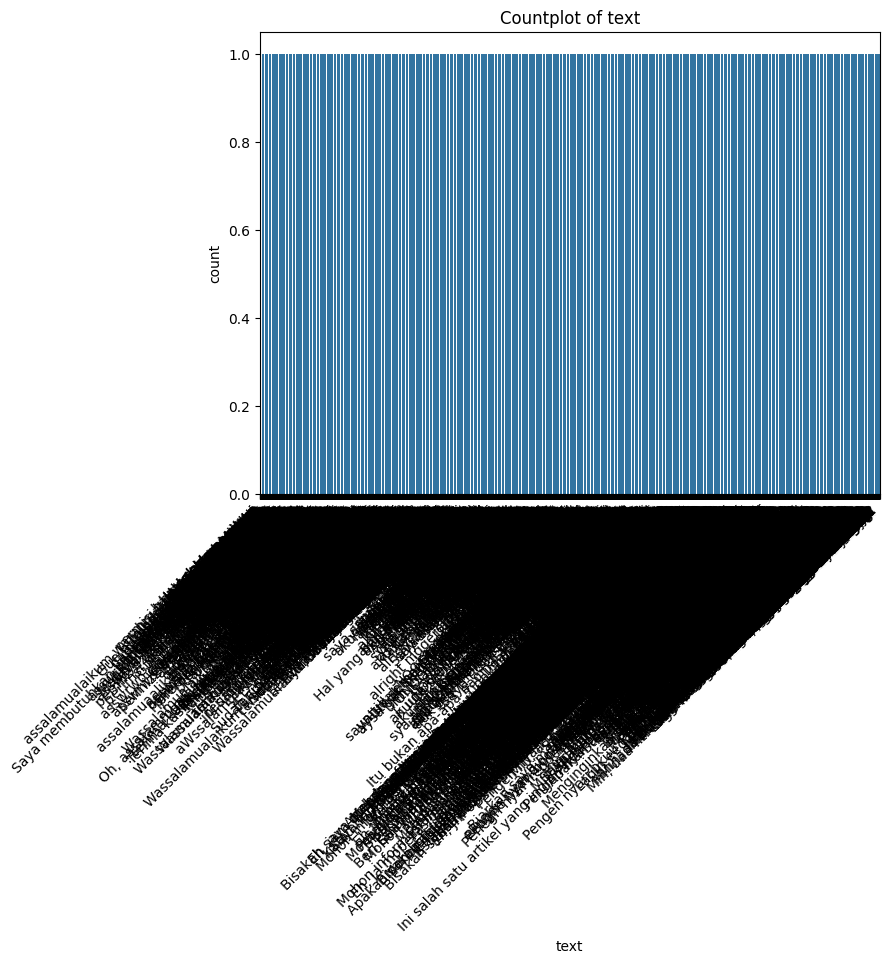

In [ ]:
# prompt: visualisasi dataset distribution /content/augmented_datasets.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/augmented_datasets.csv')

# Display basic statistics
print(df.describe())

# Visualize the distribution of each column
for col in df.columns:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    plt.show()
